In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load the dataset
levin_df = pd.read_csv(r'/content/Levine_32dim.csv')

# Display the available columns in the DataFrame
print("Available columns:")
print(levin_df.columns.tolist())

# Strip any leading or trailing spaces from column names
levin_df.columns = levin_df.columns.str.strip()

# Check columns again
print("Columns after stripping spaces:")
print(levin_df.columns.tolist())

# Specify the columns you want to delete
columns_to_delete = ['Time', 'event_number', 'file_number']  # replace with actual column names

# Drop the specified columns permanently
try:
    levin_df.drop(columns=columns_to_delete, inplace=True)
    print("Columns deleted successfully.")
except KeyError as e:
    print(f"Error: {e}")

# Optionally, display the updated DataFrame
print(levin_df.head())


Available columns:
['Time', ' Cell_length', ' DNA1', ' DNA2', ' CD45RA', ' CD133', ' CD19', ' CD22', ' CD11b', ' CD4', ' CD8', ' CD34', ' Flt3', ' CD20', ' CXCR4', ' CD235ab', ' CD45', ' CD123', ' CD321', ' CD14', ' CD33', ' CD47', ' CD11c', ' CD7', ' CD15', ' CD16', ' CD44', ' CD38', ' CD13', ' CD3', ' CD61', ' CD117', ' CD49d', ' HLA-DR', ' CD64', ' CD41', ' Viability', ' file_number', ' event_number', ' label', ' individual', ' ']
Columns after stripping spaces:
['Time', 'Cell_length', 'DNA1', 'DNA2', 'CD45RA', 'CD133', 'CD19', 'CD22', 'CD11b', 'CD4', 'CD8', 'CD34', 'Flt3', 'CD20', 'CXCR4', 'CD235ab', 'CD45', 'CD123', 'CD321', 'CD14', 'CD33', 'CD47', 'CD11c', 'CD7', 'CD15', 'CD16', 'CD44', 'CD38', 'CD13', 'CD3', 'CD61', 'CD117', 'CD49d', 'HLA-DR', 'CD64', 'CD41', 'Viability', 'file_number', 'event_number', 'label', 'individual', '']
Columns deleted successfully.
   Cell_length      DNA1      DNA2    CD45RA     CD133      CD19      CD22  \
0           22  4.391057  4.617262  0.162691

In [5]:
 levin_df.head()

Cell_length      DNA1      DNA2    CD45RA     CD133      CD19      CD22  \
0           22  4.391057  4.617262  0.162691 -0.029585 -0.006696  0.066388   
1           35  4.340481  4.816692  0.701348 -0.038280 -0.016654  0.074409   
2           32  3.838727  4.386369  0.603568 -0.032216  0.073855 -0.042977   
3           29  4.255805  4.830048  0.433747 -0.027611 -0.017661 -0.044072   
4           25  3.976909  4.506433 -0.008809 -0.030297  0.080423  0.495791   

      CD11b       CD4       CD8  ...      CD61     CD117     CD49d    HLA-DR  \
0 -0.009184  0.363602  0.520195  ... -0.002936  0.053050  0.853505  1.664480   
1  0.808031 -0.035424 -0.010551  ...  1.258437  0.089660  0.197818  0.491592   
2 -0.001881 -0.008781 -0.005632  ...  0.257137  0.046222  2.586670  1.308337   
3  0.733698 -0.019066  0.056109  ... -0.041140  0.066470  1.338669  0.140523   
4  1.107627  0.552746  0.031310  ...  0.168609 -0.006223  0.180924  0.197332   

       CD64      CD41  Viability  label  individual     
0 -0.005376 -0.001961   0.648429    1.0         1.0     
1  0.144814  0.868014   0.561384    1.0         1.0     
2 -0.010961 -0.010413   0.643337    1.0         1.0     
3 -0.013449 -0.026039  -0.026523    1.0         1.0     
4  0.076167 -0.040488   0.283287    1.0         1.0     

[5 rows x 39 columns]

In [6]:
# Find duplicate rows
duplicate_rows_levin_df = levin_df[levin_df.duplicated()]

# Print the number of duplicate rows
print("Number of duplicate rows: ", duplicate_rows_levin_df.shape[0])


Number of duplicate rows:  0


In [7]:
levin_df.count()      # Used to count the number of rows

Cell_length    24430
DNA1           24430
DNA2           24430
CD45RA         24430
CD133          24430
CD19           24430
CD22           24430
CD11b          24430
CD4            24430
CD8            24430
CD34           24430
Flt3           24430
CD20           24430
CXCR4          24430
CD235ab        24430
CD45           24430
CD123          24430
CD321          24430
CD14           24430
CD33           24430
CD47           24430
CD11c          24430
CD7            24430
CD15           24430
CD16           24430
CD44           24430
CD38           24430
CD13           24430
CD3            24430
CD61           24429
CD117          24429
CD49d          24429
HLA-DR         24429
CD64           24429
CD41           24429
Viability      24429
label          24429
individual     24429
               24429
dtype: int64

In [8]:
print(levin_df.isnull().sum())

Cell_length    0
DNA1           0
DNA2           0
CD45RA         0
CD133          0
CD19           0
CD22           0
CD11b          0
CD4            0
CD8            0
CD34           0
Flt3           0
CD20           0
CXCR4          0
CD235ab        0
CD45           0
CD123          0
CD321          0
CD14           0
CD33           0
CD47           0
CD11c          0
CD7            0
CD15           0
CD16           0
CD44           0
CD38           0
CD13           0
CD3            0
CD61           1
CD117          1
CD49d          1
HLA-DR         1
CD64           1
CD41           1
Viability      1
label          1
individual     1
               1
dtype: int64


In [9]:

# Convert non-numeric values to NaN
levin_df = levin_df.apply(pd.to_numeric, errors='coerce')

# Calculate Z-scores
z_scores = np.abs((levin_df - levin_df.mean()) / levin_df.std())

# Set a threshold for Z-scores
threshold = 3

# Identify outliers
outliers = levin_df[(z_scores > threshold).any(axis=1)]

print("Outliers detected using Z-score method:")
print(outliers)


Outliers detected using Z-score method:
       Cell_length      DNA1      DNA2    CD45RA     CD133      CD19  \
0               22  4.391057  4.617262  0.162691 -0.029585 -0.006696   
1               35  4.340481  4.816692  0.701348 -0.038280 -0.016654   
2               32  3.838727  4.386369  0.603568 -0.032216  0.073855   
3               29  4.255805  4.830048  0.433747 -0.027611 -0.017661   
4               25  3.976909  4.506433 -0.008809 -0.030297  0.080423   
...            ...       ...       ...       ...       ...       ...   
24413           53  3.257507  3.936667  0.263757  0.412517  0.070834   
24420           50  3.188402  3.724319  0.187799 -0.046789  1.028283   
24425           39  3.785392  4.580426 -0.041503  0.434002  0.136873   
24427           29  4.024743  4.344139  0.668522 -0.044747  0.252937   
24428           28  3.469028  4.150137 -0.017813 -0.034991  0.016483   

           CD22     CD11b       CD4       CD8  ...      CD61     CD117  \
0      0.066388 -0.00

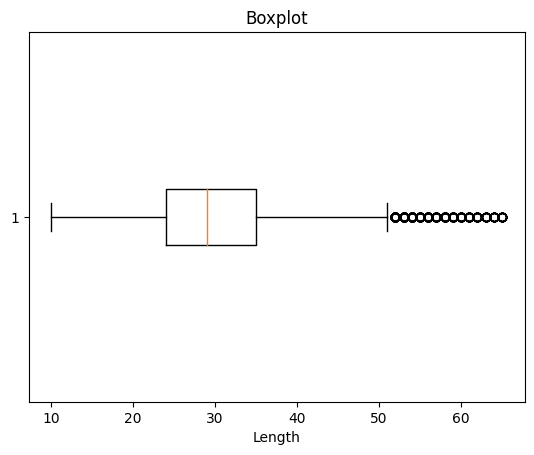

In [10]:
cell_length=levin_df['Cell_length']
plt.boxplot(cell_length,vert=False)
plt.title('Boxplot')
plt.xlabel('Length')
plt.show()

In [11]:
levin_df.describe()

Cell_length          DNA1          DNA2        CD45RA         CD133  \
count  24430.000000  24430.000000  24430.000000  24430.000000  24430.000000   
mean      30.010151      3.782343      4.481095      0.546476      0.166225   
std        9.298850      0.340067      0.336729      0.485842      0.257842   
min       10.000000      2.817552      2.820342     -0.046670     -0.047072   
25%       24.000000      3.555680      4.281596      0.164665     -0.017303   
50%       29.000000      3.808856      4.510101      0.442890      0.065546   
75%       35.000000      4.039755      4.716767      0.819194      0.264157   
max       65.000000      4.541989      5.511077      5.797917      2.003633   

               CD19          CD22         CD11b           CD4           CD8  \
count  24430.000000  24430.000000  24430.000000  24430.000000  24430.000000   
mean       0.117065      0.115240      0.322990      0.706730      0.194327   
std        0.206522      0.219802      0.418236      0.586046      0.344128   
min       -0.046949     -0.047066     -0.047084     -0.047074     -0.047080   
25%       -0.021692     -0.023162     -0.003059      0.148976     -0.015594   
50%        0.017976     -0.000009      0.172200      0.653103      0.067150   
75%        0.187140      0.171176      0.495021      1.146954      0.269248   
max        1.255451      2.715009      2.898450      5.215317      3.694843   

       ...          CD61         CD117         CD49d        HLA-DR  \
count  ...  24429.000000  24429.000000  24429.000000  24429.000000   
mean   ...      0.266443      0.239126      0.750459      0.432955   
std    ...      0.357619      0.447909      0.570396      0.939402   
min    ...     -0.047086     -0.047093     -0.046663     -0.047048   
25%    ...     -0.004367     -0.013521      0.298072     -0.007637   
50%    ...      0.125487      0.072764      0.646450      0.108757   
75%    ...      0.412378      0.289142      1.097429      0.337279   
max    ...      1.835353      3.620648      3.829459      6.218881   

               CD64          CD41     Viability         label  individual       
count  24429.000000  24429.000000  24429.000000  24429.000000     24429.0  0.0  
mean       0.119119      0.139040      0.677378      5.648082         1.0  NaN  
std        0.157024      0.288745      0.549373      2.052344         0.0  NaN  
min       -0.047102     -0.047059     -0.046352      1.000000         1.0  NaN  
25%       -0.012680     -0.023613      0.234357      4.000000         1.0  NaN  
50%        0.069616     -0.001216      0.556334      7.000000         1.0  NaN  
75%        0.214635      0.178217      0.999967      7.000000         1.0  NaN  
max        0.567422      2.562904      2.432971      7.000000         1.0  NaN  

[8 rows x 39 columns]

In [12]:
# Class label distribution
class_distribution = levin_df['label'].value_counts()
print("Class Label Distribution:")
print(class_distribution)


Class Label Distribution:
label
7.0    16189
2.0     2602
4.0     2066
3.0     1778
1.0      946
6.0      666
5.0      182
Name: count, dtype: int64


In [13]:
# Correlation matrix
correlation_matrix = levin_df.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
             Cell_length      DNA1      DNA2    CD45RA     CD133      CD19  \
Cell_length     1.000000 -0.092925 -0.089136  0.109943  0.086032  0.088586   
DNA1           -0.092925  1.000000  0.750720  0.015523  0.054511  0.016742   
DNA2           -0.089136  0.750720  1.000000  0.040766  0.059242  0.030277   
CD45RA          0.109943  0.015523  0.040766  1.000000  0.062266  0.072782   
CD133           0.086032  0.054511  0.059242  0.062266  1.000000  0.027713   
CD19            0.088586  0.016742  0.030277  0.072782  0.027713  1.000000   
CD22            0.065984  0.024222  0.031753  0.069360  0.034542  0.040008   
CD11b           0.054828  0.057921  0.063736  0.151912  0.036212  0.033726   
CD4             0.066747 -0.082504 -0.031818 -0.052538 -0.055940  0.023360   
CD8             0.051481  0.005895  0.016806  0.148299  0.044545  0.048295   
CD34           -0.027378  0.192082  0.154649 -0.124560  0.159909 -0.009385   
Flt3            0.081930  0.012145  0.039063

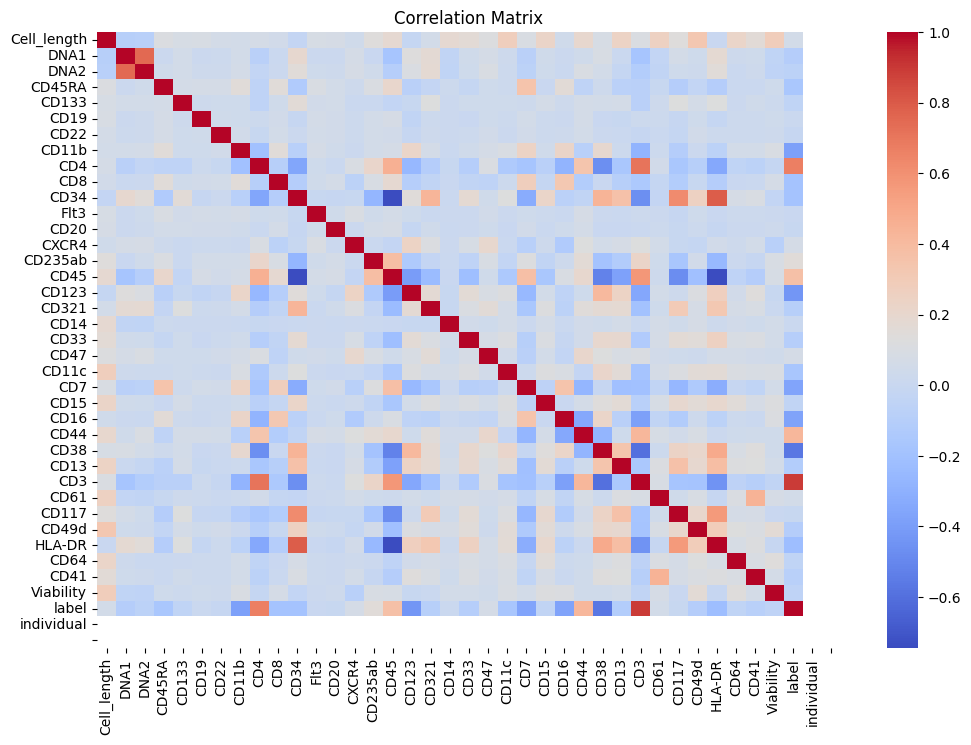

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')  # Set annot=False
plt.title('Correlation Matrix')
plt.show()

In [15]:
# Calculate the range of each feature
feature_ranges = levin_df.describe().loc[['min', 'max']]

# Iterate over each feature and print the range
print("Range of Each Feature:")
for feature in feature_ranges.columns:
    min_value = feature_ranges[feature]['min']
    max_value = feature_ranges[feature]['max']
    print(f"{feature}: Range = [{min_value}, {max_value}]")

Range of Each Feature:
Cell_length: Range = [10.0, 65.0]
DNA1: Range = [2.817552328109741, 4.541988849639893]
DNA2: Range = [2.8203420639038086, 5.511076927185059]
CD45RA: Range = [-0.0466701537370681, 5.797916889190674]
CD133: Range = [-0.0470721907913684, 2.003633499145508]
CD19: Range = [-0.0469491109251976, 1.255450963973999]
CD22: Range = [-0.0470661781728267, 2.715009450912476]
CD11b: Range = [-0.047083955258131, 2.8984501361846924]
CD4: Range = [-0.047073733061552, 5.2153167724609375]
CD8: Range = [-0.047079749405384, 3.694843292236328]
CD34: Range = [-0.0470606572926044, 5.147996425628662]
Flt3: Range = [-0.0470997914671897, 6.652141571044922]
CD20: Range = [-0.047099620103836, 1.016612529754639]
CXCR4: Range = [-0.047006394714117, 4.893614292144775]
CD235ab: Range = [-0.0469822995364666, 6.248050689697266]
CD45: Range = [2.041961431503296, 6.951331615447998]
CD123: Range = [-0.0468880720436573, 5.98445987701416]
CD321: Range = [-0.0439480692148208, 4.3485870361328125]
CD14: Ra

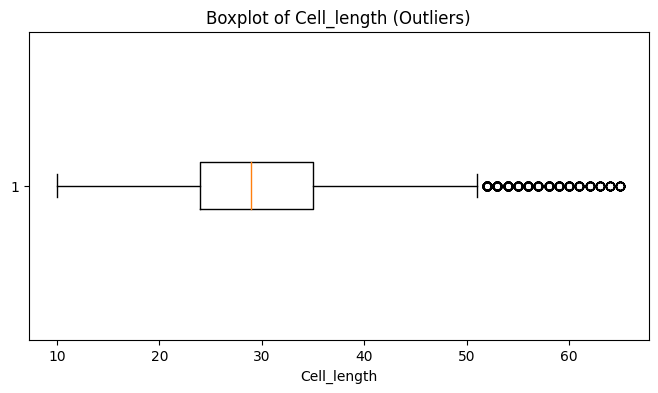

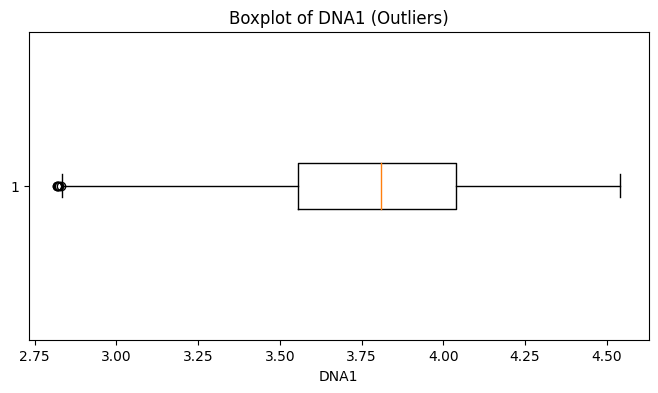

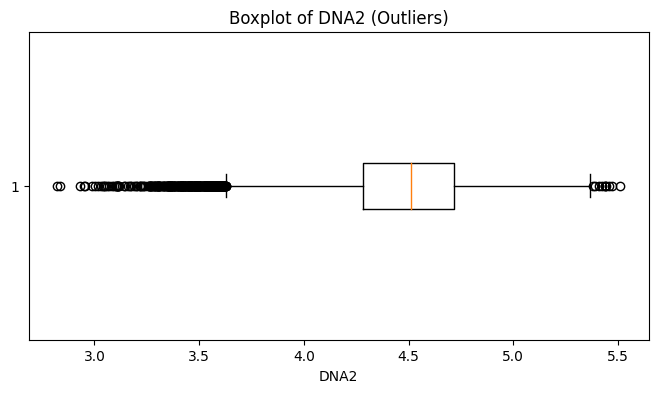

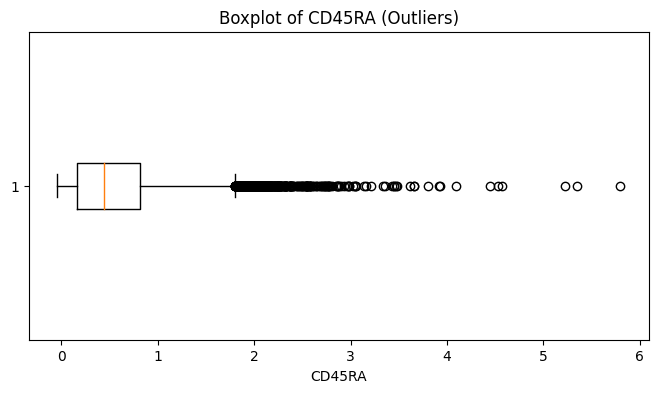

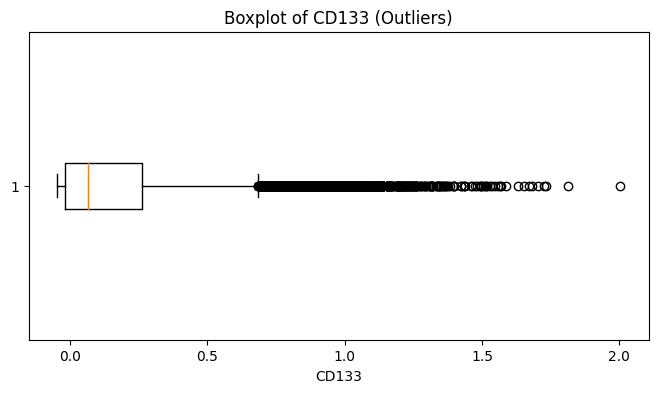

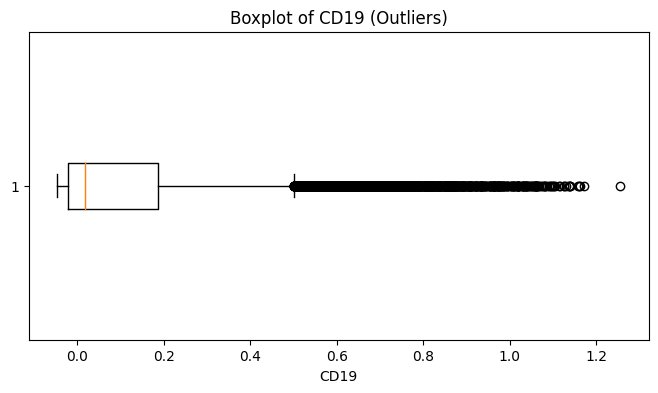

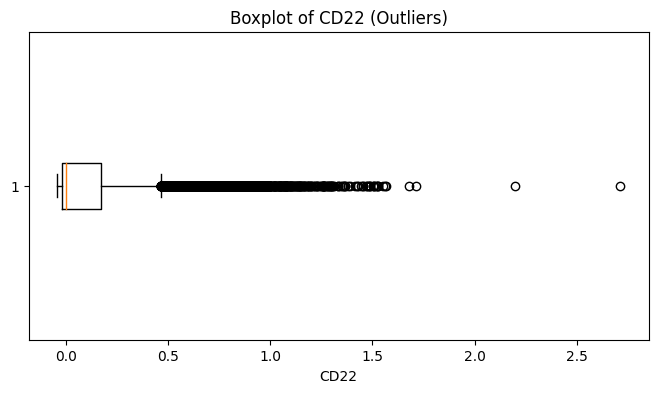

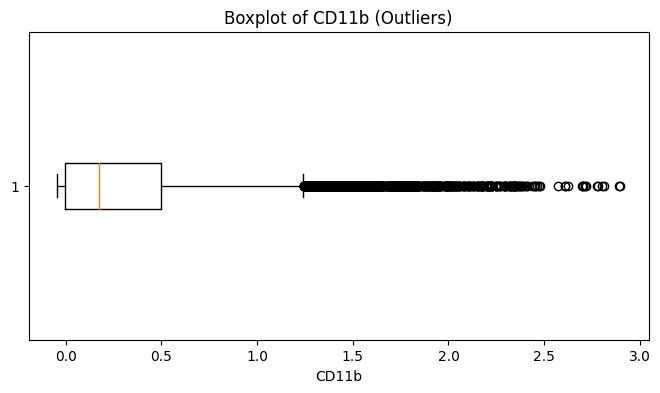

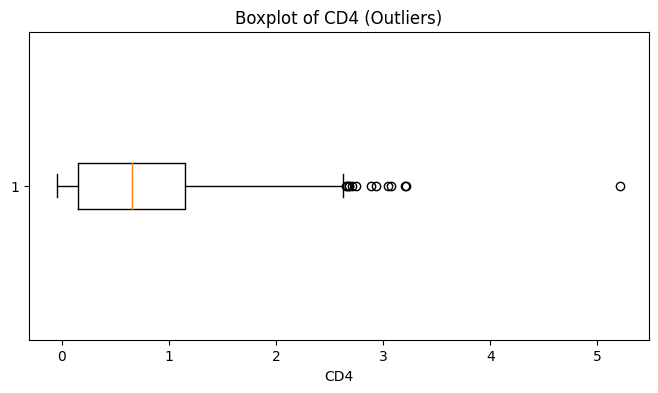

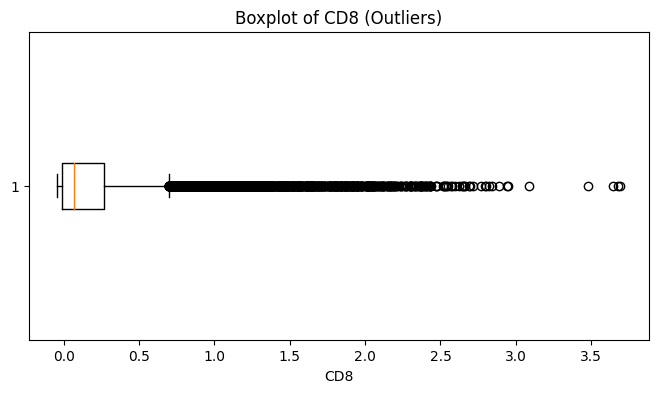

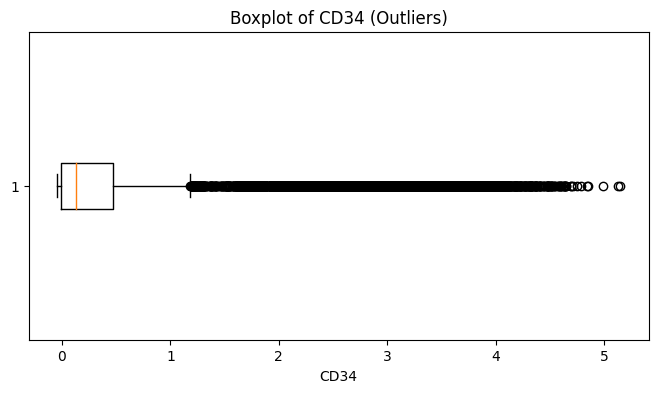

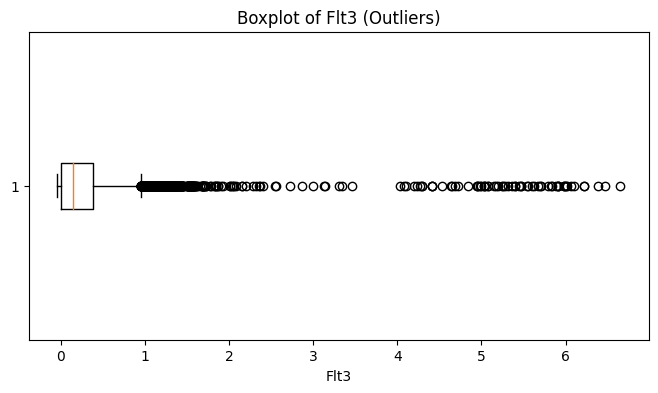

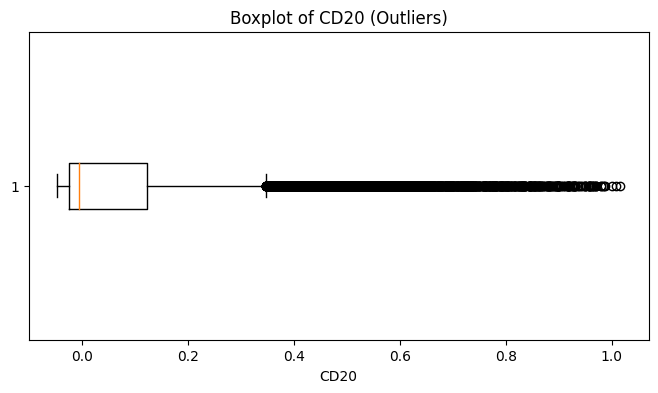

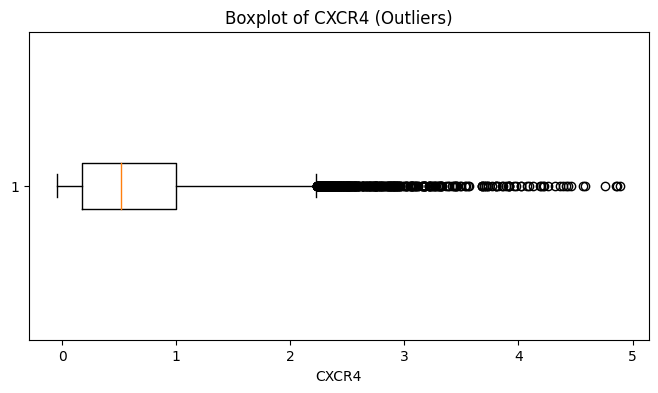

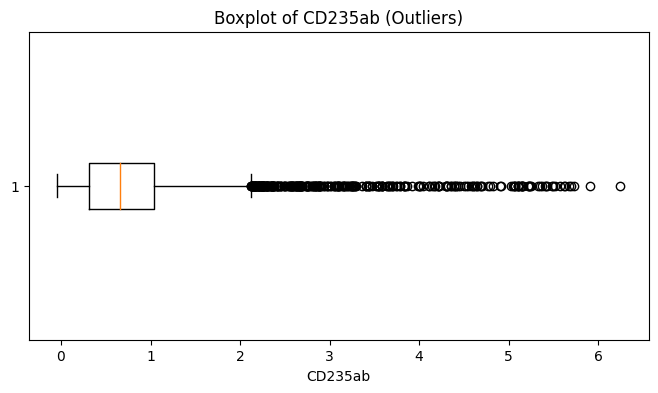

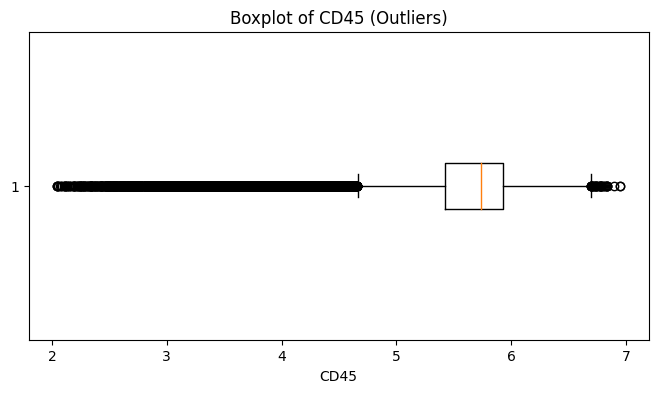

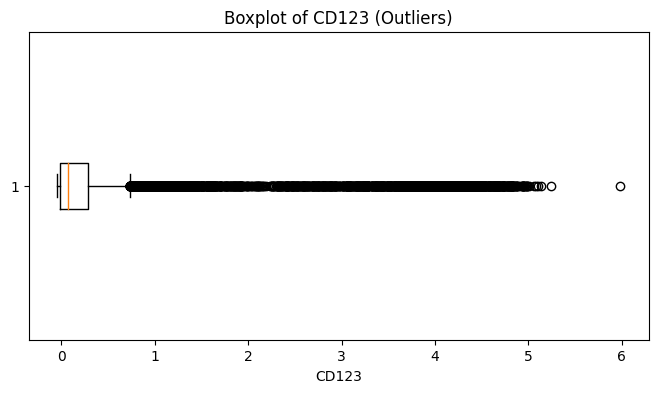

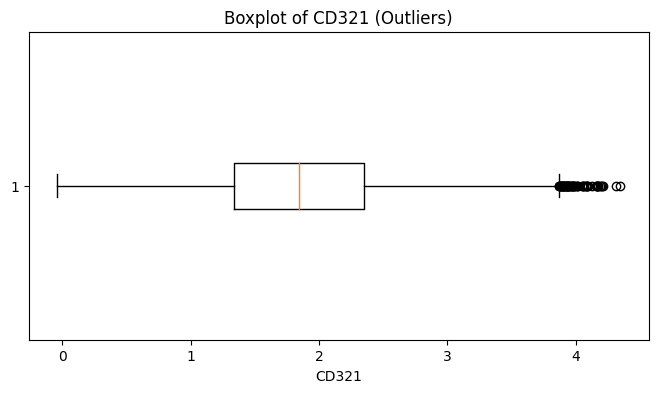

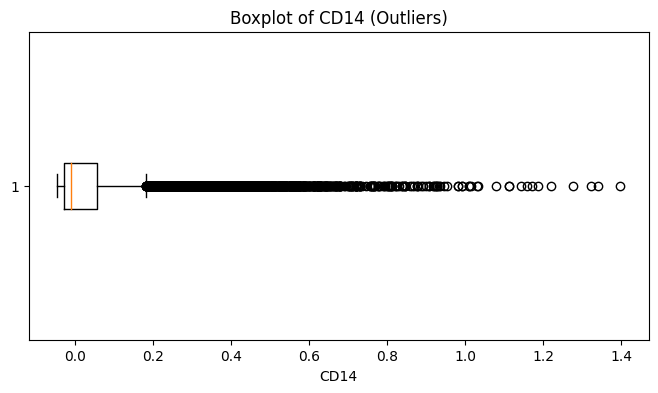

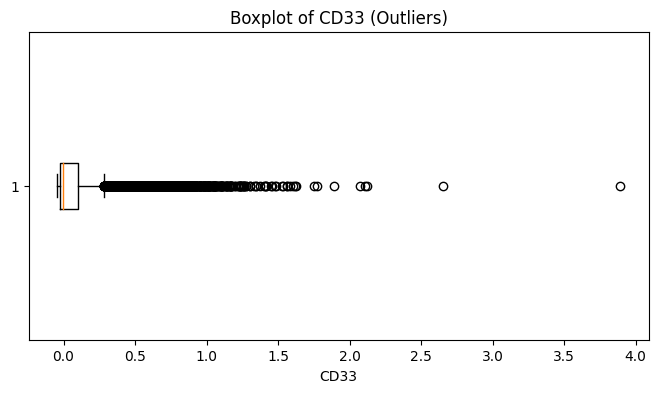

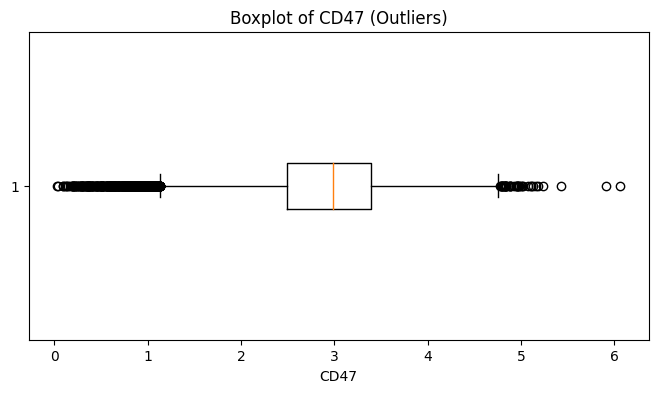

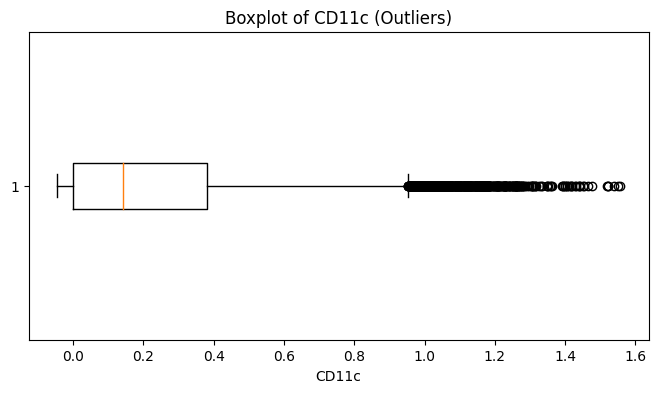

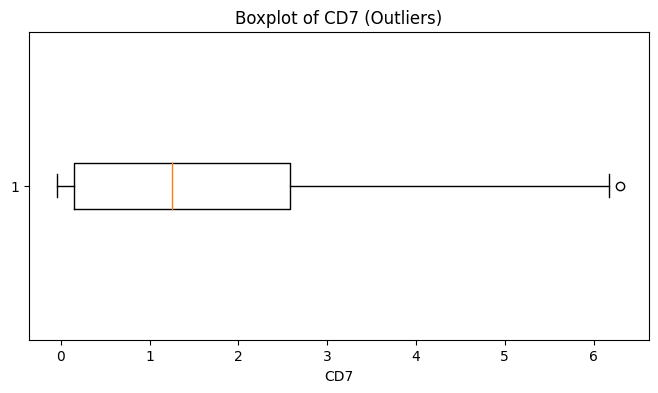

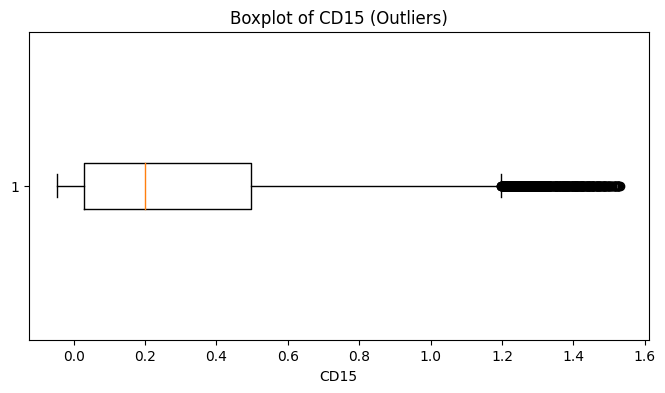

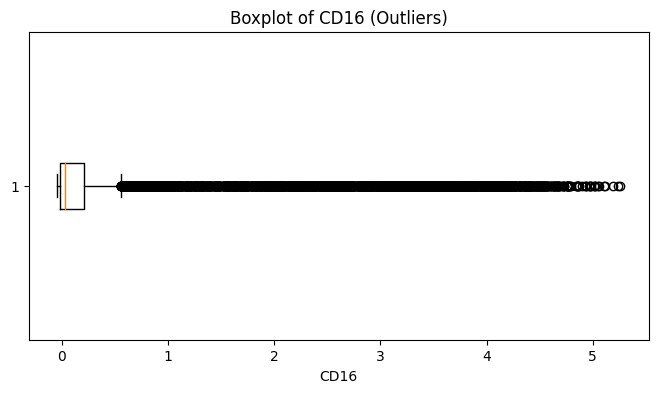

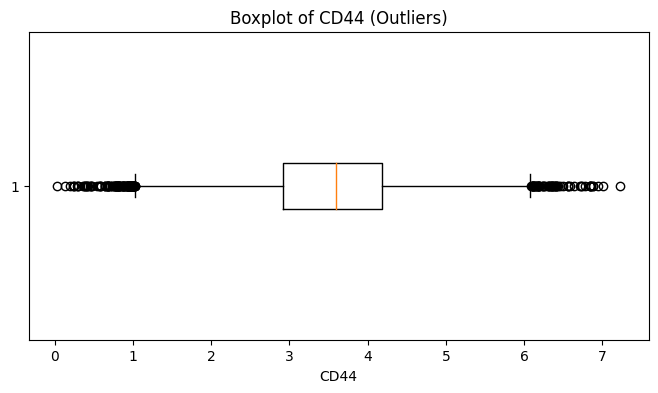

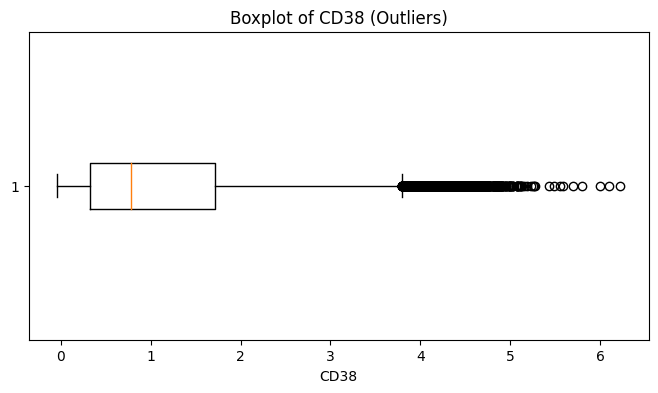

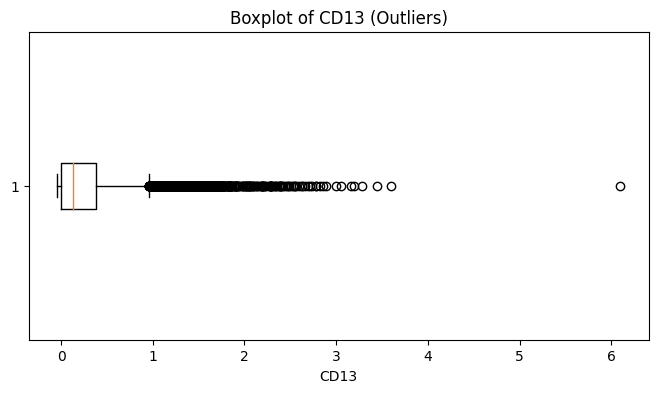

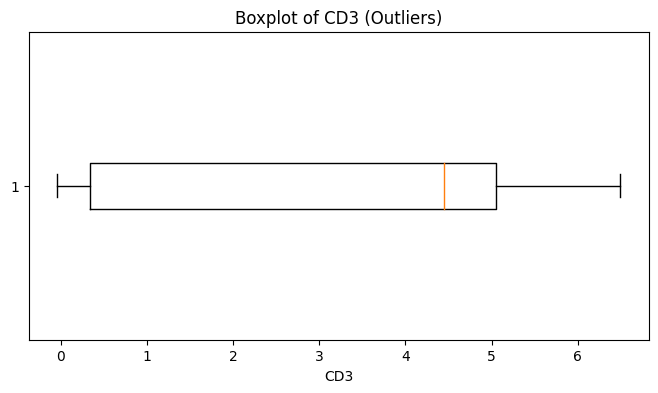

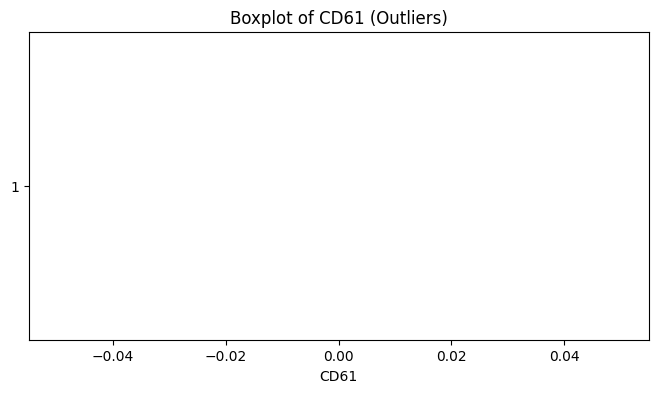

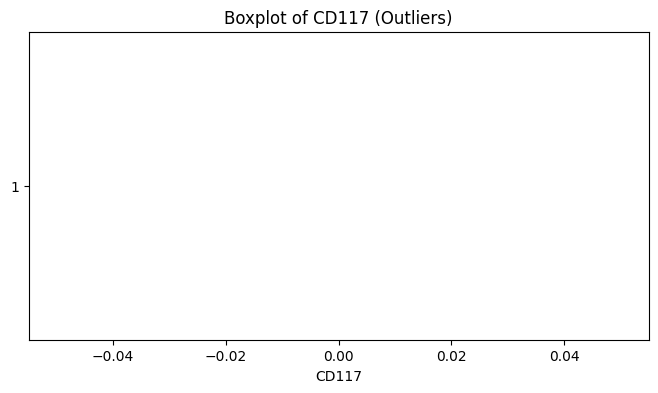

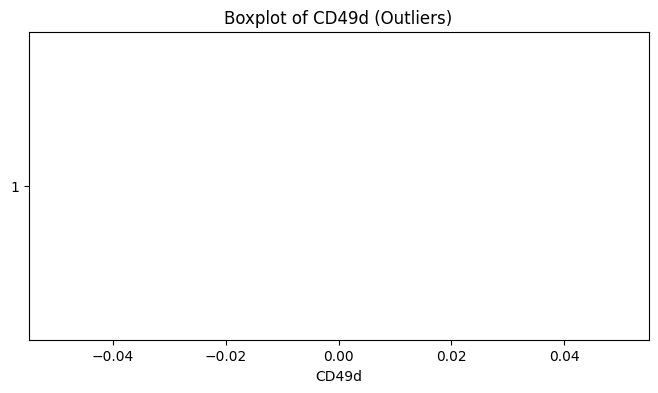

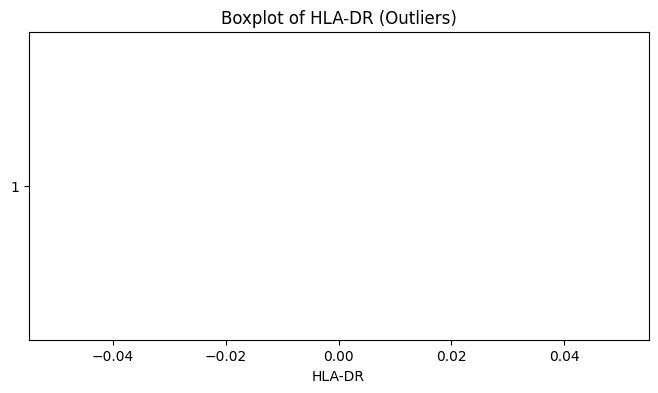

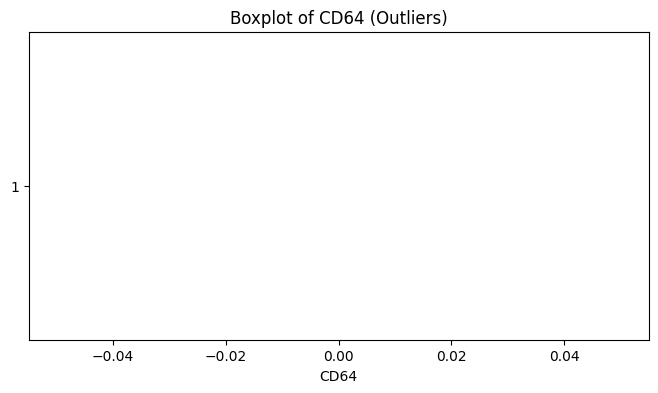

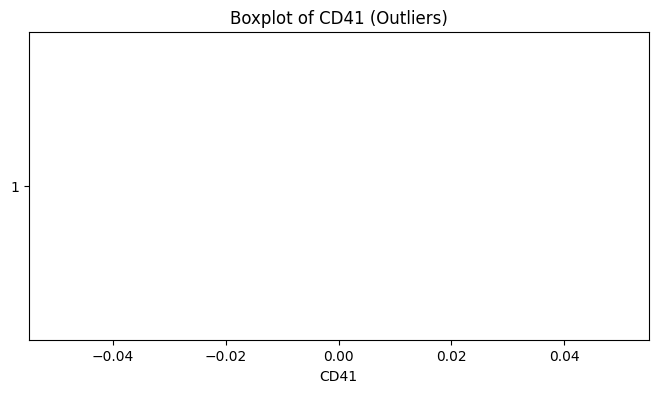

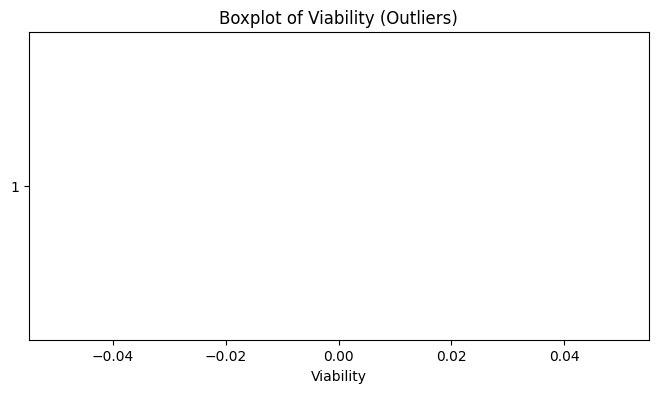

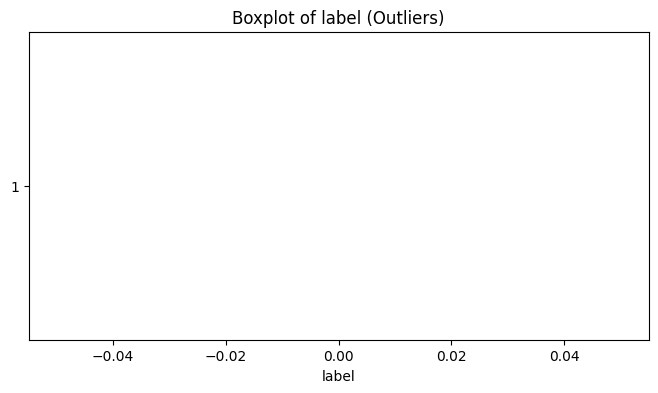

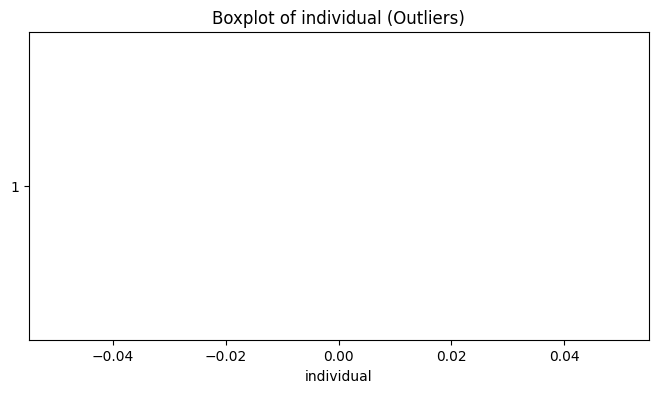

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

columns_to_plot = [
    'Cell_length', 'DNA1', 'DNA2', 'CD45RA', 'CD133', 'CD19', 'CD22',
    'CD11b', 'CD4', 'CD8', 'CD34', 'Flt3', 'CD20', 'CXCR4', 'CD235ab',
    'CD45', 'CD123', 'CD321', 'CD14', 'CD33', 'CD47', 'CD11c', 'CD7',
    'CD15', 'CD16', 'CD44', 'CD38', 'CD13', 'CD3', 'CD61', 'CD117', 'CD49d',
    'HLA-DR', 'CD64', 'CD41', 'Viability', 'label', 'individual'
]

for feature in columns_to_plot:
    if feature in levin_df.columns:
        plt.figure(figsize=(8, 4))
        plt.boxplot(levin_df[feature], vert=False)
        plt.title(f'Boxplot of {feature} (Outliers)')
        plt.xlabel(feature)
        plt.show()  # Show the plot
    else:
        print(f"Column '{feature}' not found in DataFrame.")


                  Column   Kurtosis                   Category
Cell_length  Cell_length   3.628461  Leptokurtic (heavy tails)
DNA1                DNA1   2.530331  Platykurtic (light tails)
DNA2                DNA2   3.579377  Leptokurtic (heavy tails)
CD45RA            CD45RA   6.758788  Leptokurtic (heavy tails)
CD133              CD133   6.540415  Leptokurtic (heavy tails)
CD19                CD19   6.404838  Leptokurtic (heavy tails)
CD22                CD22   9.853764  Leptokurtic (heavy tails)
CD11b              CD11b   6.518289  Leptokurtic (heavy tails)
CD4                  CD4   2.431711  Platykurtic (light tails)
CD8                  CD8  15.816956  Leptokurtic (heavy tails)
CD34                CD34   7.516262  Leptokurtic (heavy tails)
Flt3                Flt3  78.255947  Leptokurtic (heavy tails)
CD20                CD20   7.421509  Leptokurtic (heavy tails)
CXCR4              CXCR4   5.800389  Leptokurtic (heavy tails)
CD235ab          CD235ab  13.485200  Leptokurtic (heavy

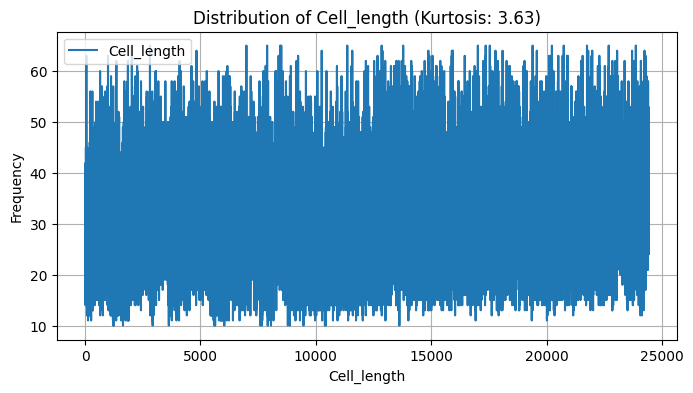

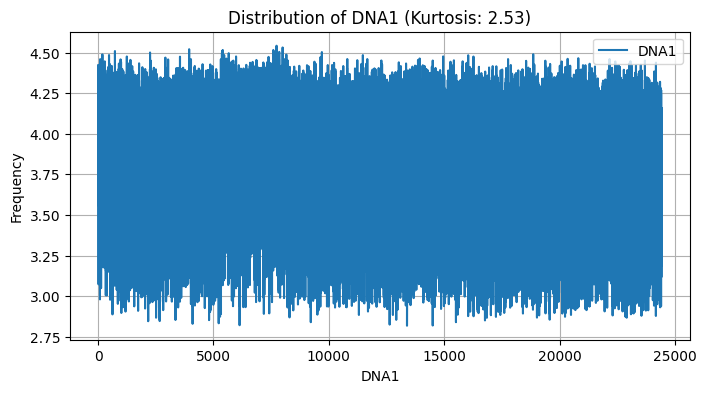

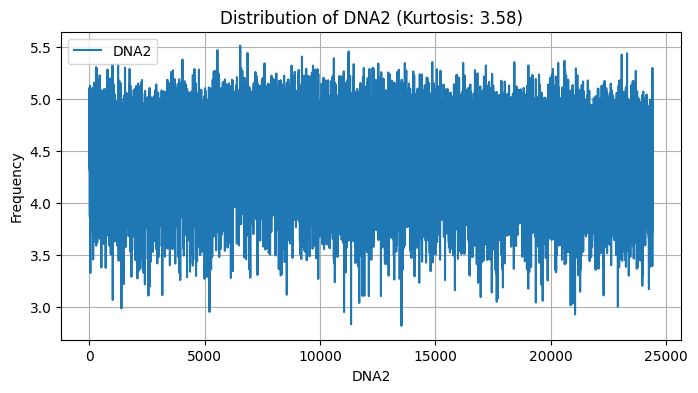

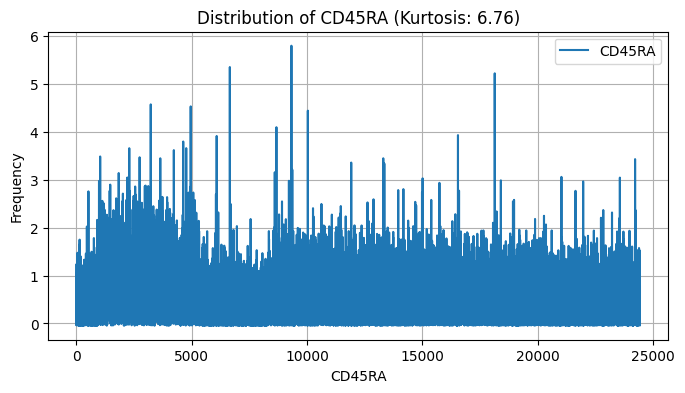

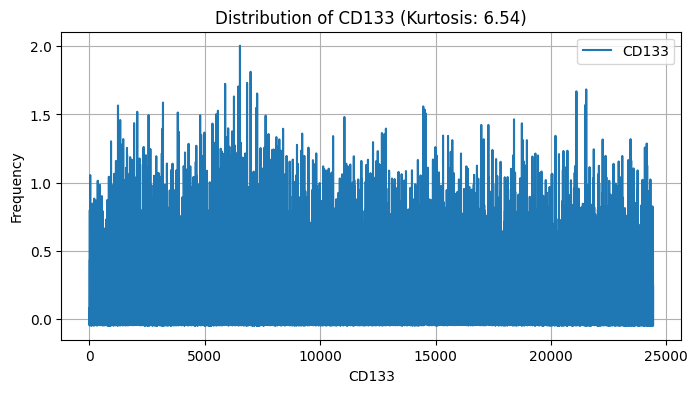

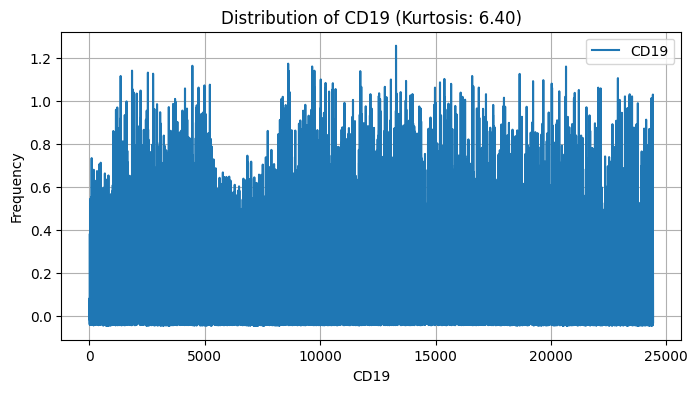

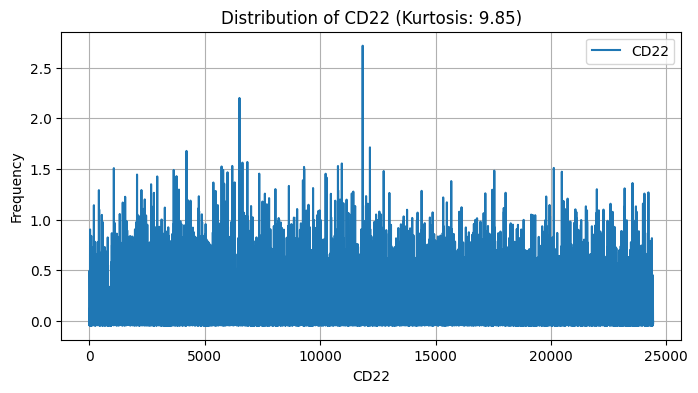

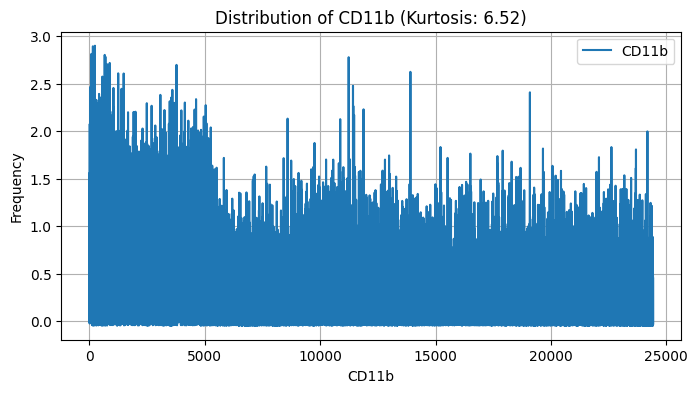

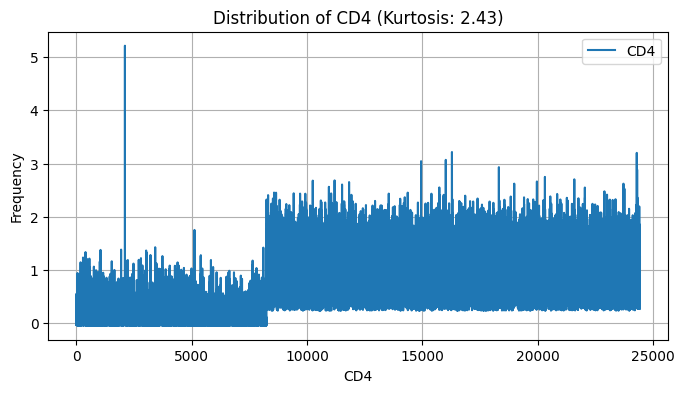

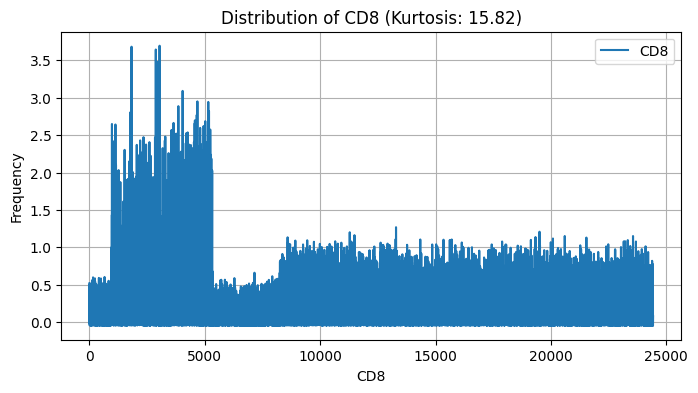

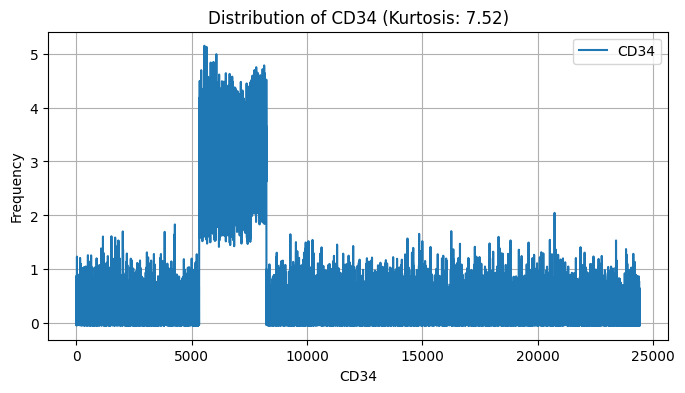

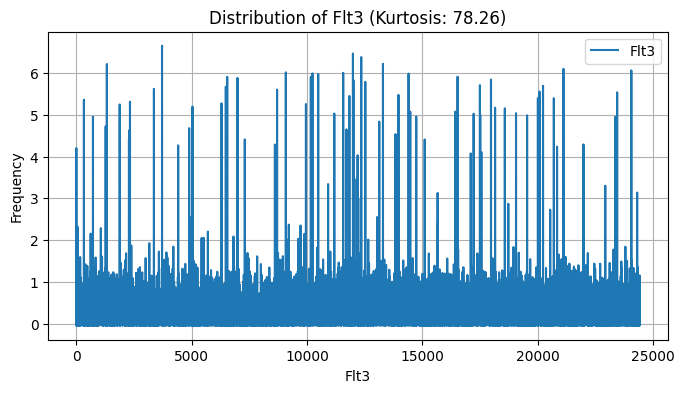

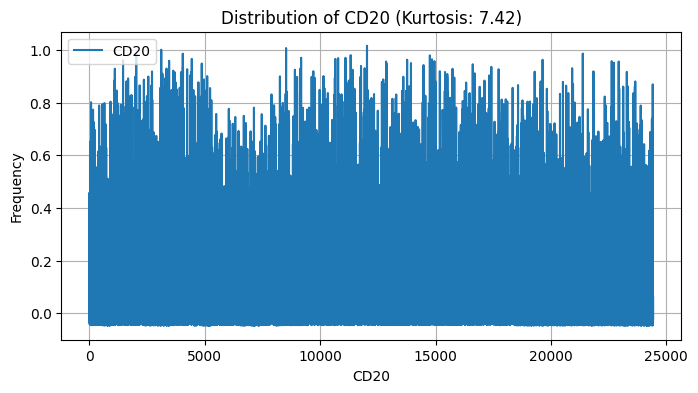

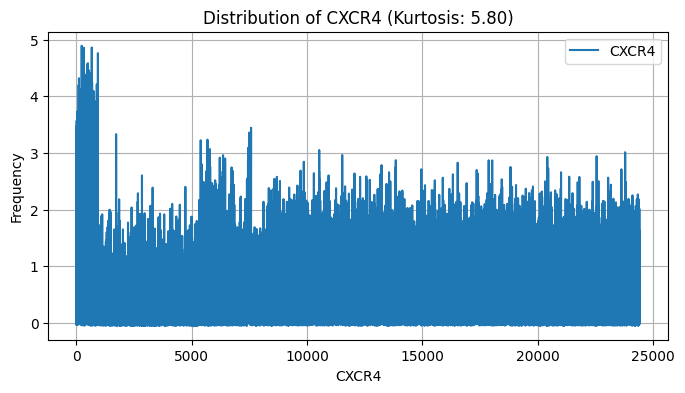

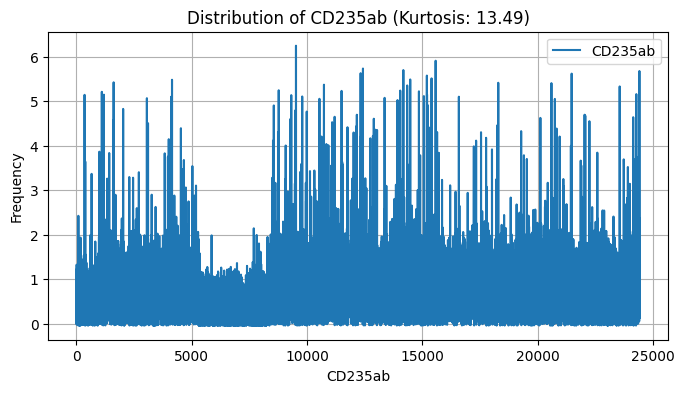

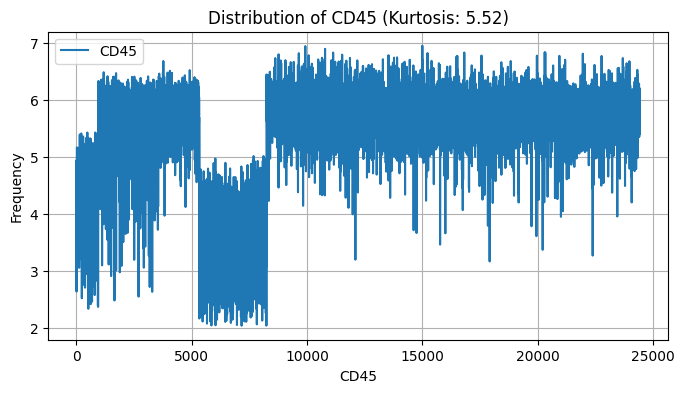

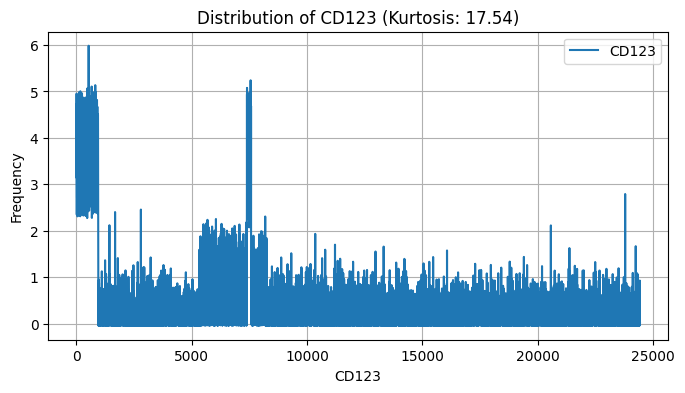

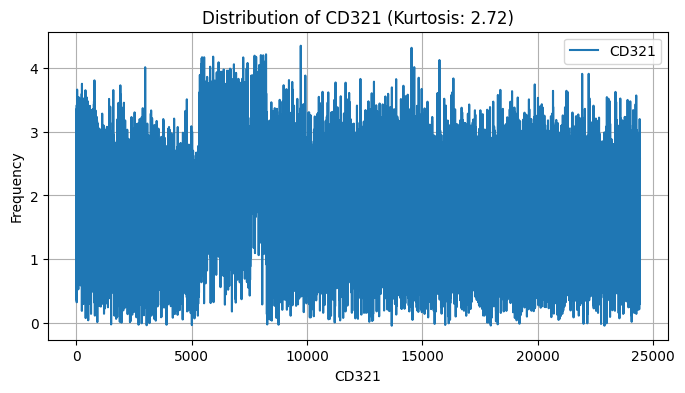

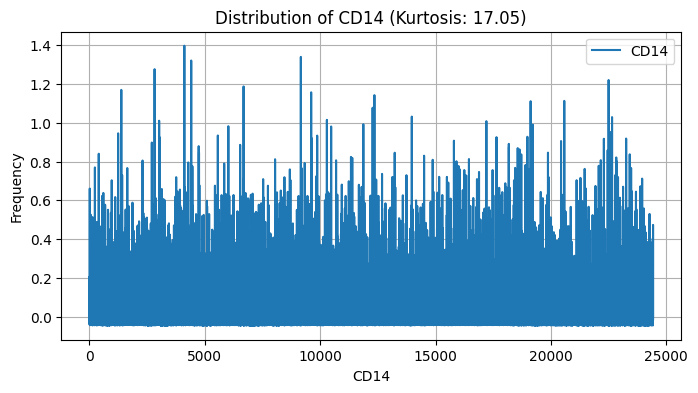

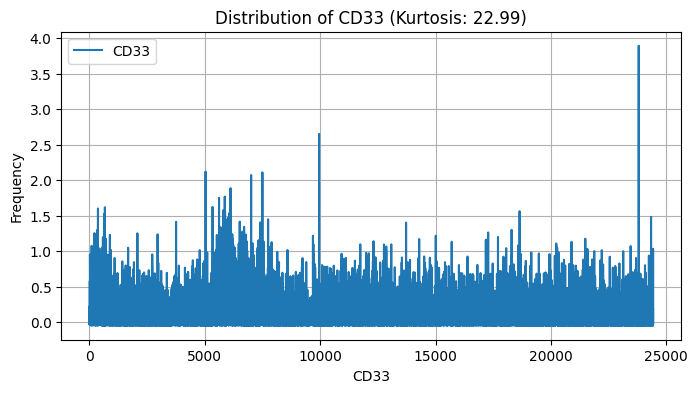

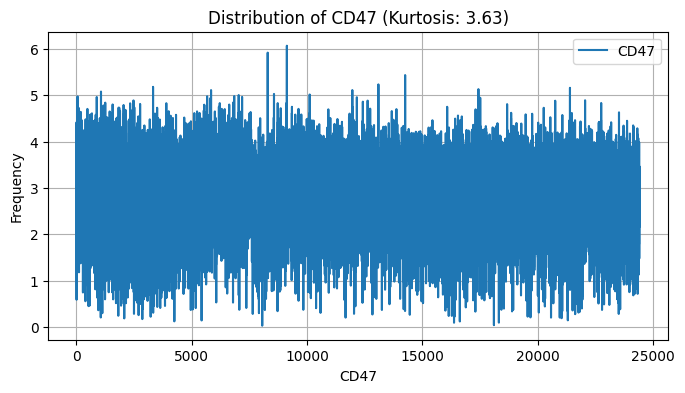

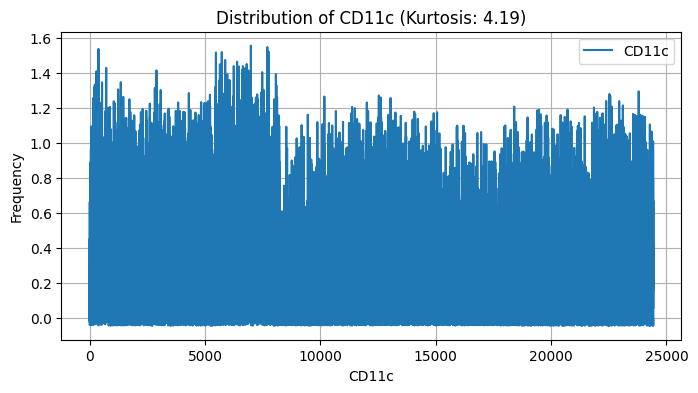

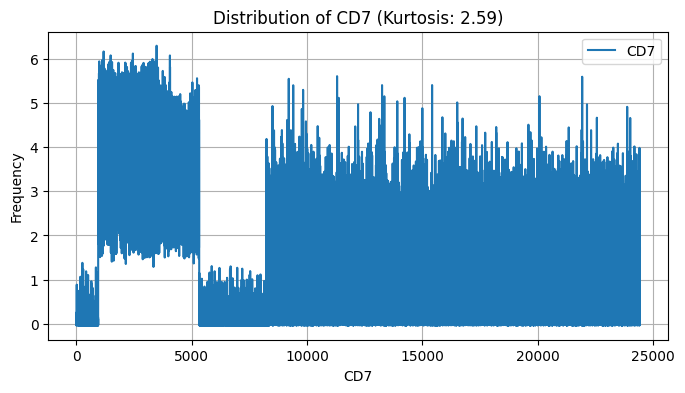

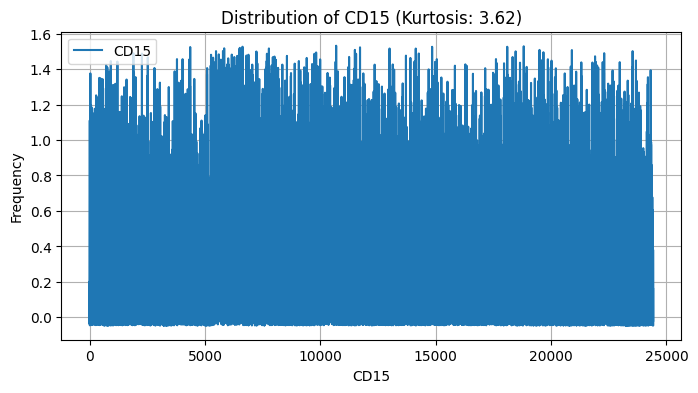

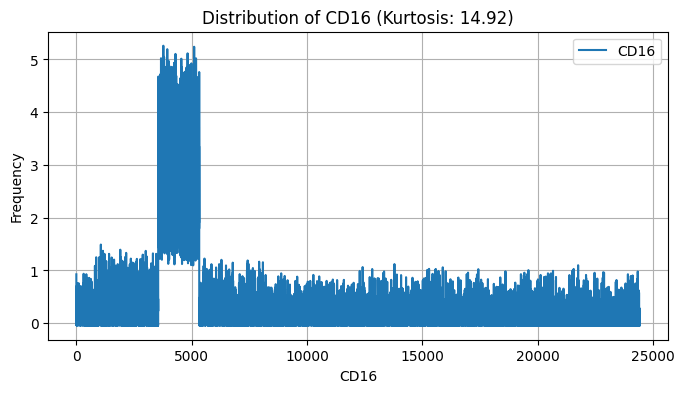

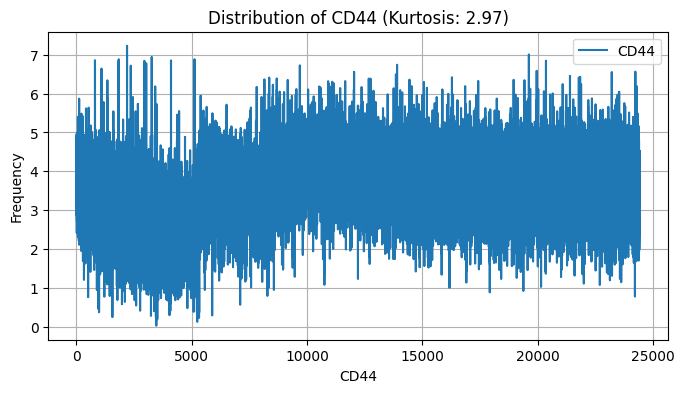

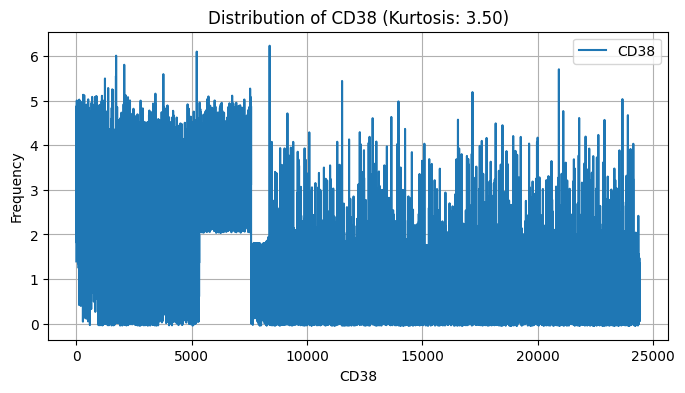

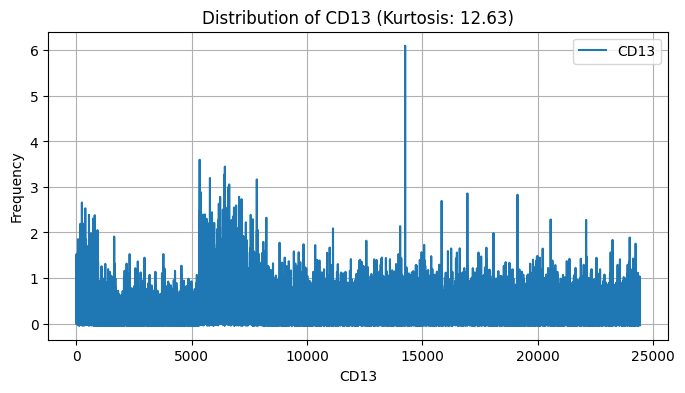

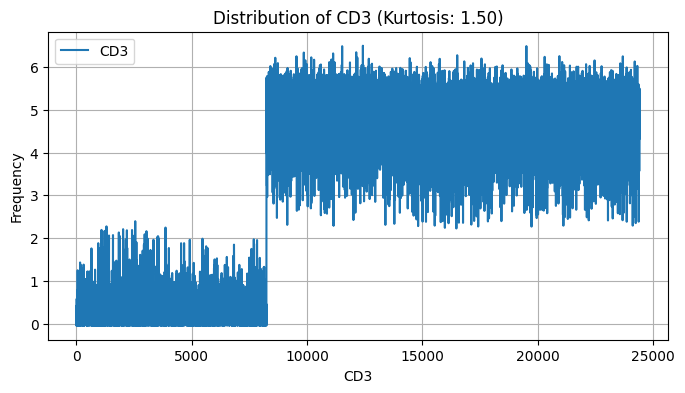

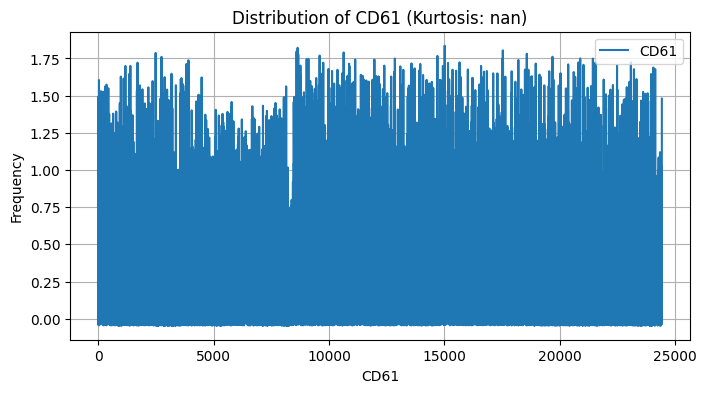

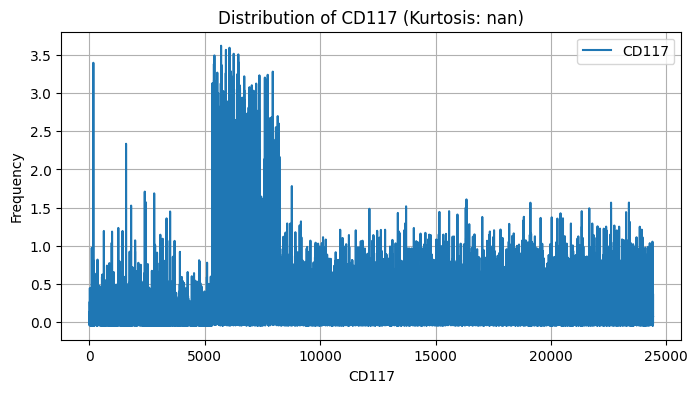

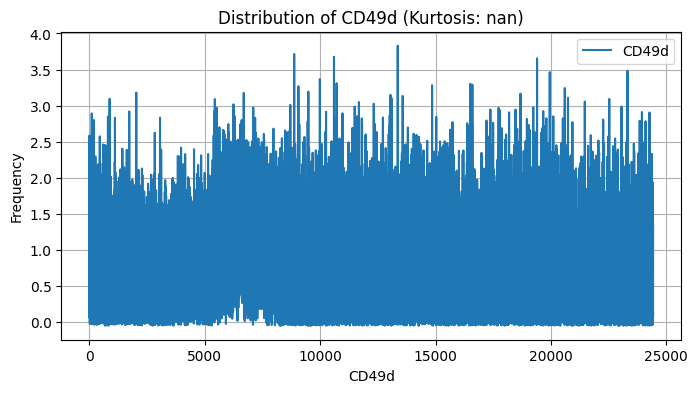

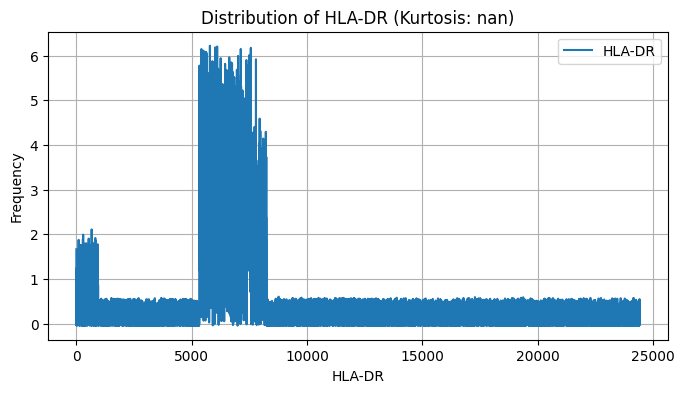

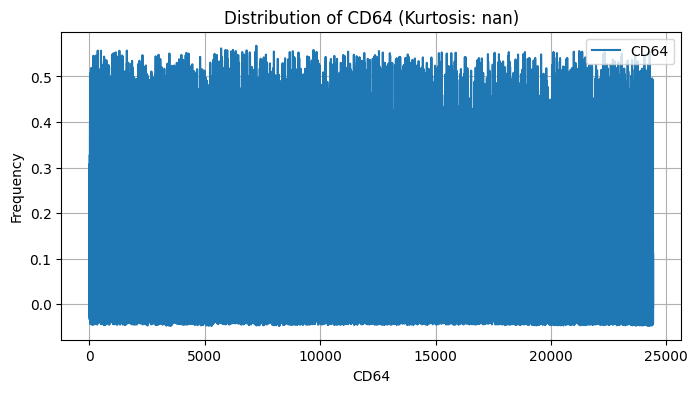

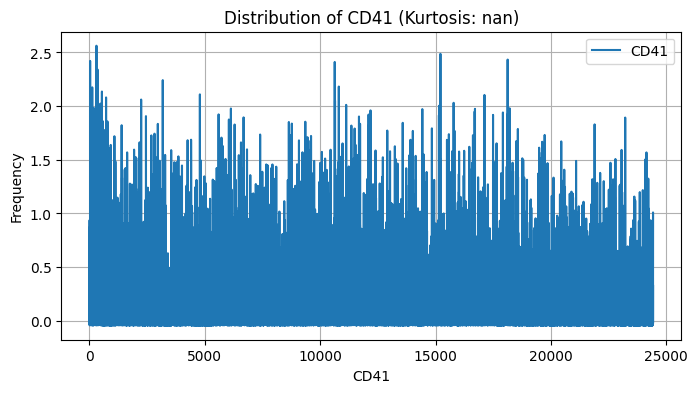

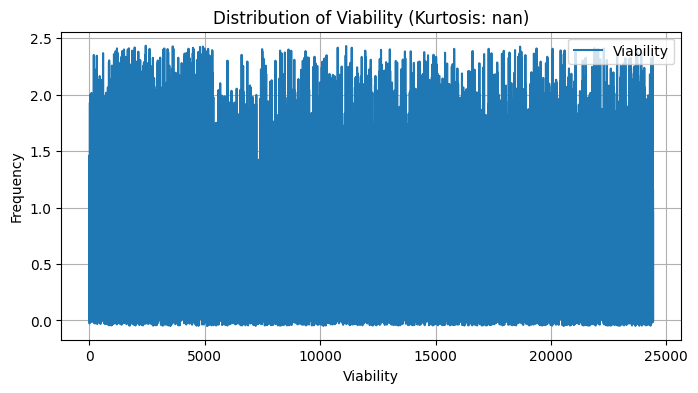

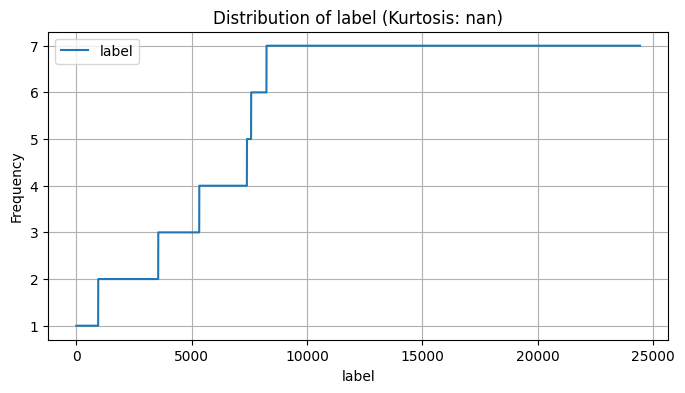

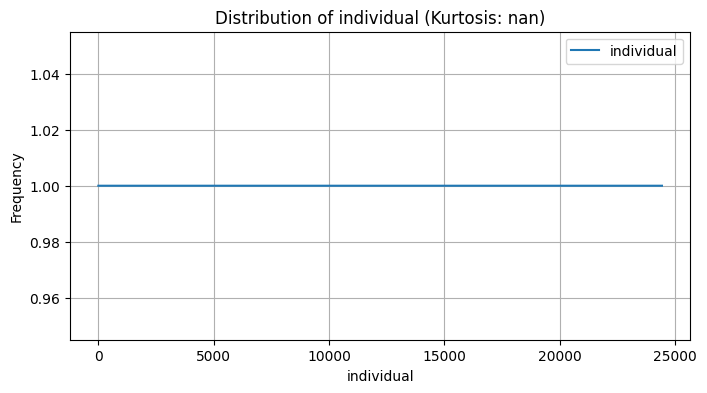

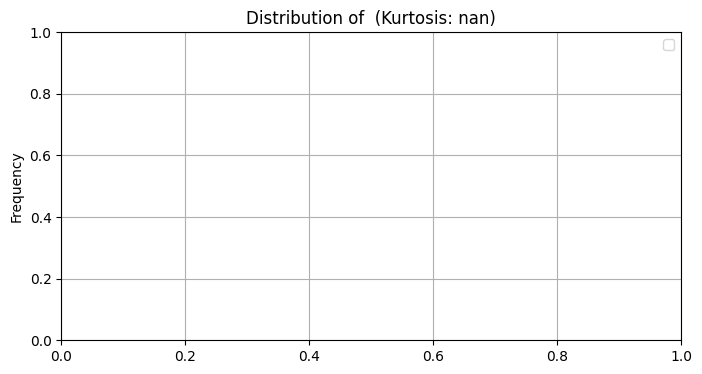

In [17]:
from scipy.stats import kurtosis

# Calculate kurtosis for each column
kurtosis_values = levin_df.apply(kurtosis, fisher=False)  # Fisher=False gives Pearson kurtosis (normal kurtosis = 3)

# Create a DataFrame with kurtosis values
kurtosis_df = pd.DataFrame({'Column': levin_df.columns, 'Kurtosis': kurtosis_values})

# Categorize the kurtosis values (Leptokurtic, Mesokurtic, Platykurtic)
def categorize_kurtosis(value):
    if value > 3:
        return 'Leptokurtic (heavy tails)'
    elif value < 3:
        return 'Platykurtic (light tails)'
    else:
        return 'Mesokurtic (normal tails)'

kurtosis_df['Category'] = kurtosis_df['Kurtosis'].apply(categorize_kurtosis)

# Print the kurtosis values and their categories
print(kurtosis_df)

# Line plots for each column
for column in levin_df.columns:
    plt.figure(figsize=(8, 4))
    sns.lineplot(data=levin_df[column].dropna(), label=column)
    plt.title(f'Distribution of {column} (Kurtosis: {kurtosis_df.loc[kurtosis_df["Column"] == column, "Kurtosis"].values[0]:.2f})')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.legend()
    plt.show()


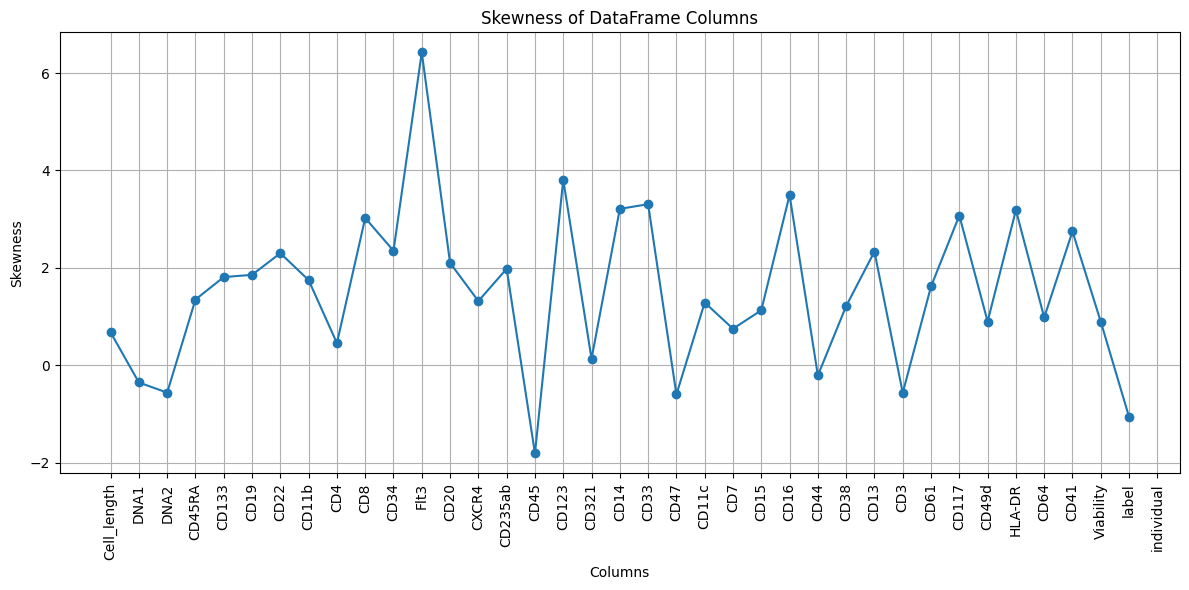

In [21]:
# 1. Data Type Conversion (Important!)
for col in levin_df.columns:
    levin_df[col] = pd.to_numeric(levin_df[col], errors='coerce')

# 2. Calculate Skewness
skewness_values = levin_df.apply(lambda x: skew(x, nan_policy='omit'))

# 3. Create DataFrame for Plotting
skewness_df = pd.DataFrame({'Column': levin_df.columns, 'Skewness': skewness_values})

# 4. Plot Line Graph
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.plot(skewness_df['Column'], skewness_df['Skewness'], marker='o', linestyle='-')
plt.title('Skewness of DataFrame Columns')
plt.xlabel('Columns')
plt.ylabel('Skewness')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

             Skewness                   Category
Cell_length  0.677368               Right-skewed
DNA1        -0.350488  Approximately symmetrical
DNA2        -0.559730                Left-skewed
CD45RA       1.351152               Right-skewed
CD133        1.812029               Right-skewed
CD19         1.857903               Right-skewed
CD22         2.302225               Right-skewed
CD11b        1.749921               Right-skewed
CD4          0.456378  Approximately symmetrical
CD8          3.025342               Right-skewed
CD34         2.351853               Right-skewed
Flt3         6.423278               Right-skewed
CD20         2.102291               Right-skewed
CXCR4        1.319857               Right-skewed
CD235ab      1.982211               Right-skewed
CD45        -1.806874                Left-skewed
CD123        3.809999               Right-skewed
CD321        0.135180  Approximately symmetrical
CD14         3.212165               Right-skewed
CD33         3.30781

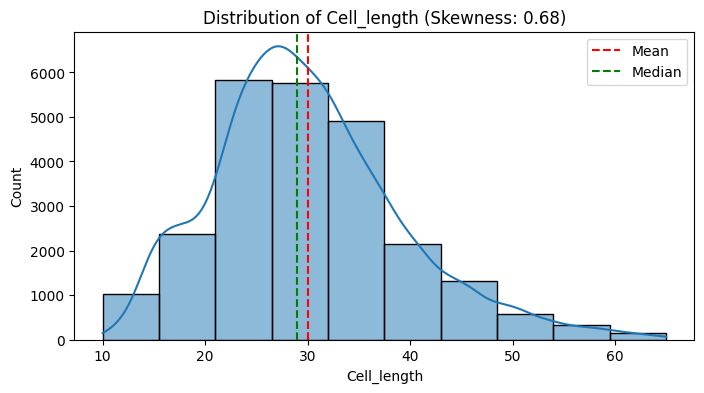

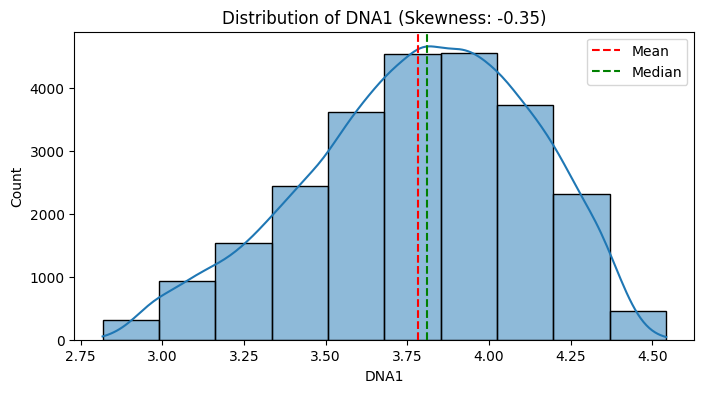

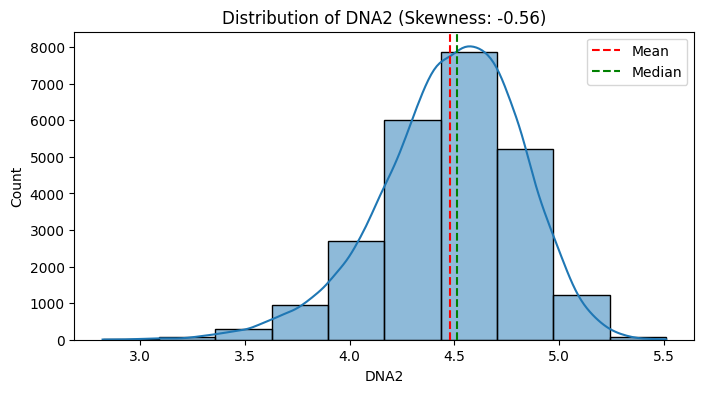

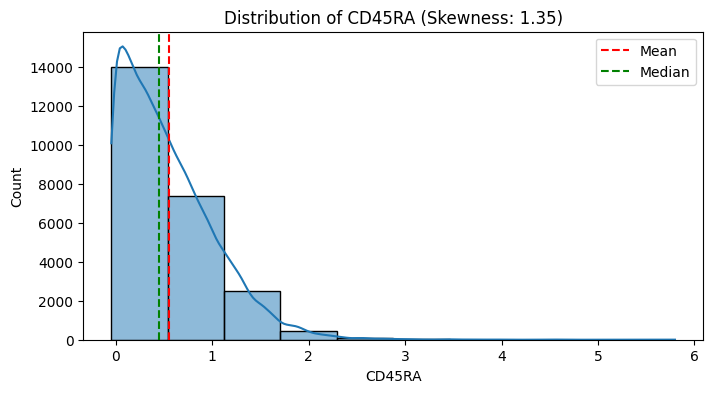

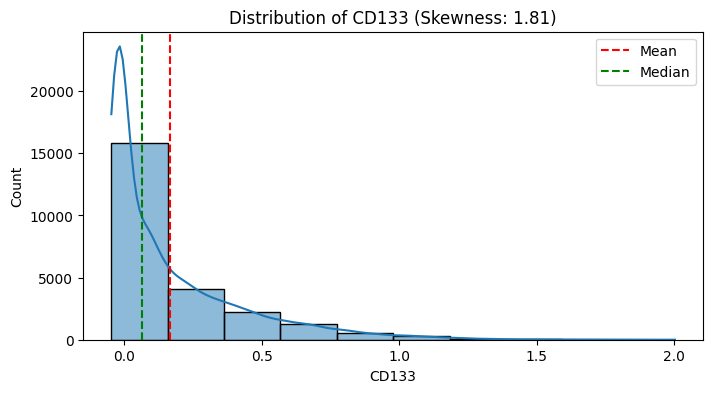

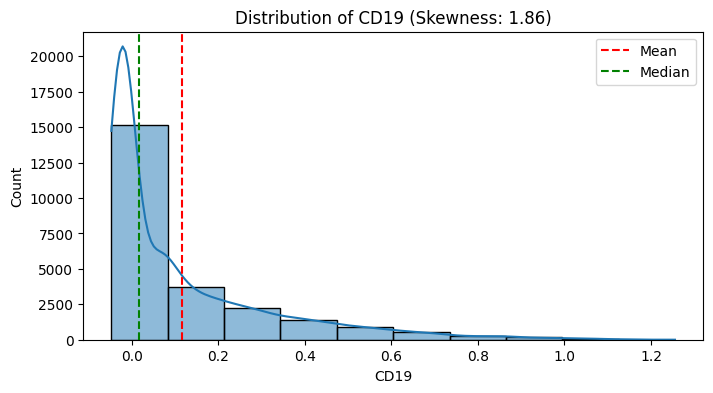

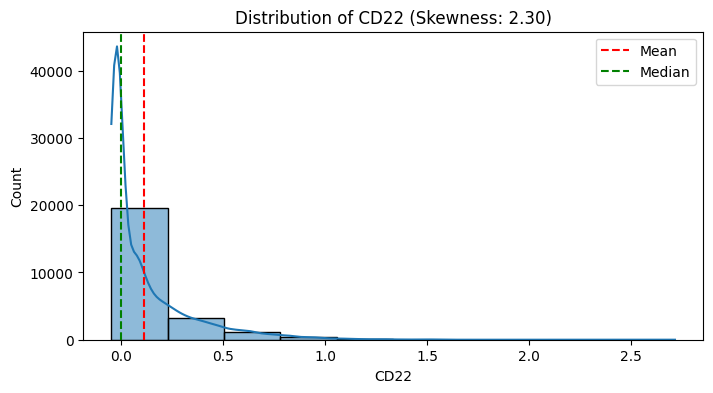

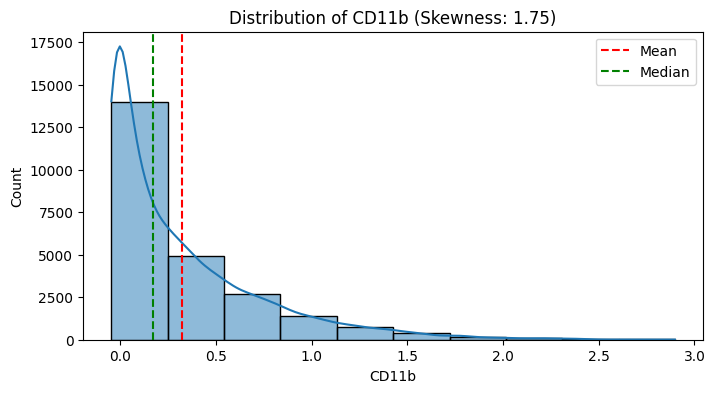

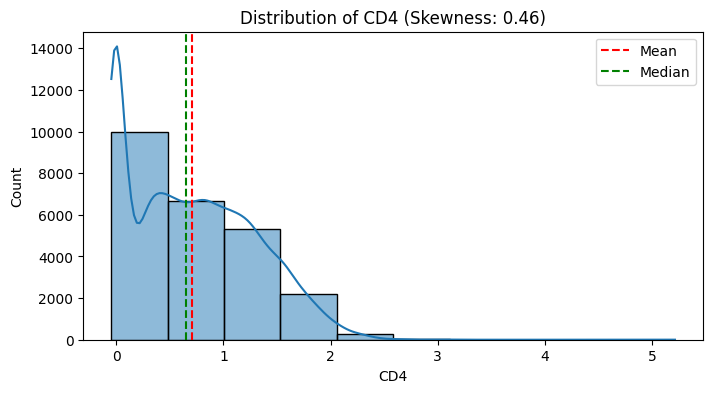

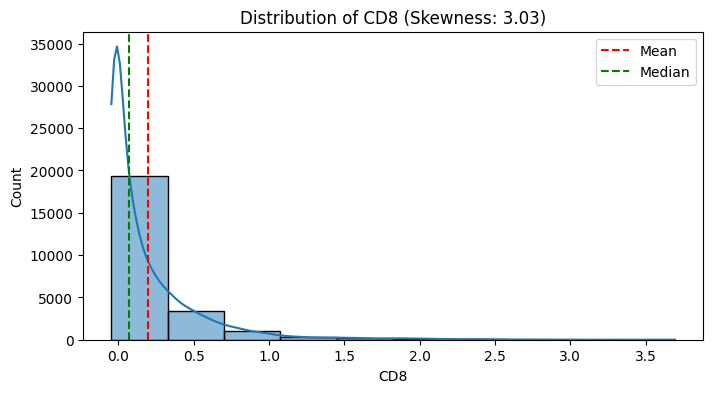

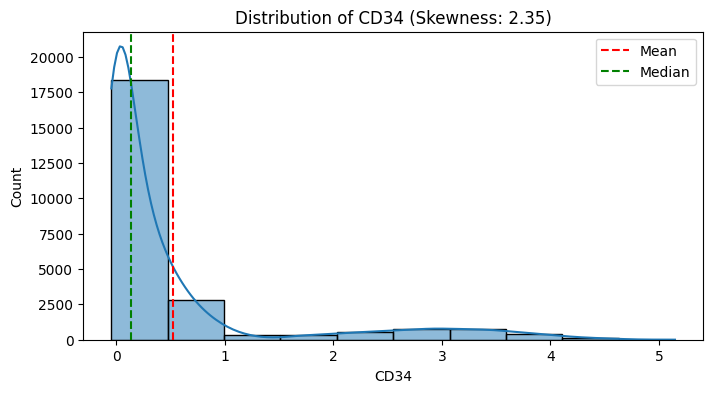

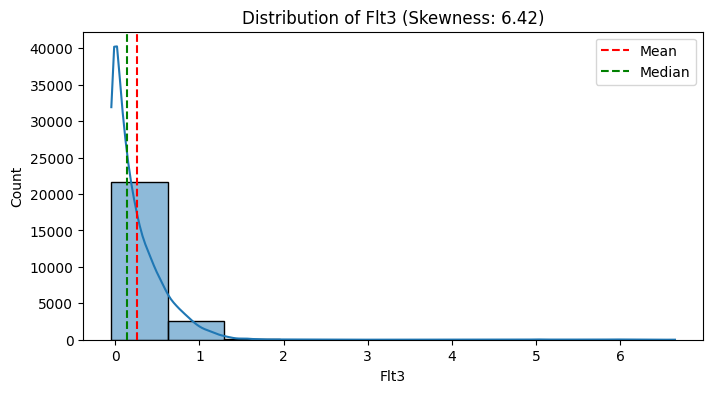

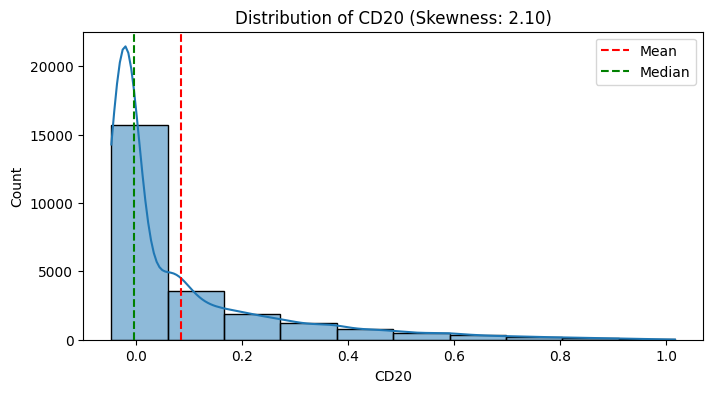

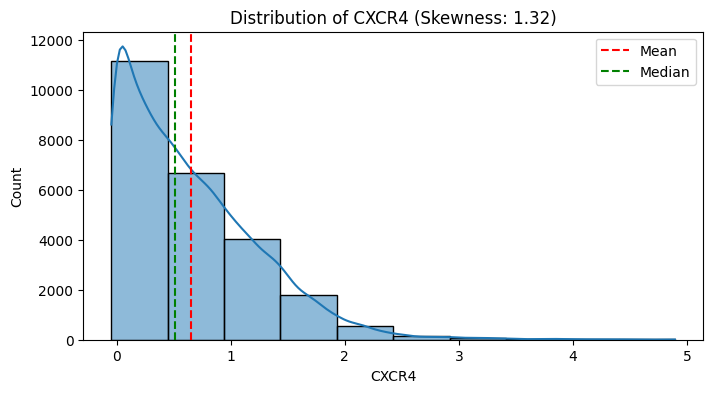

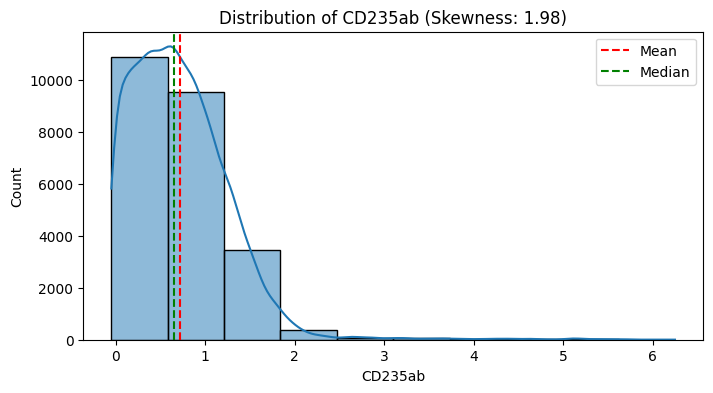

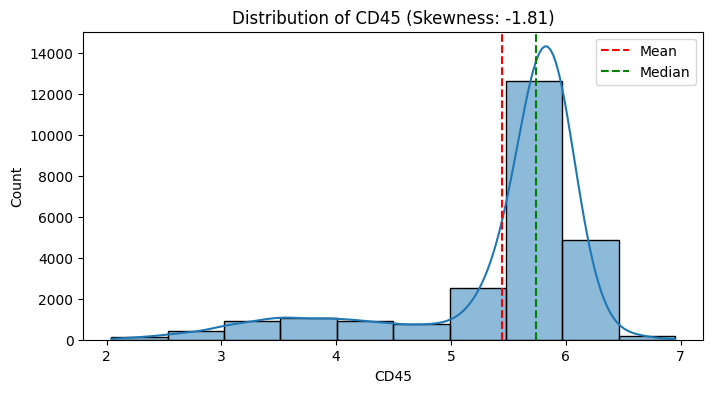

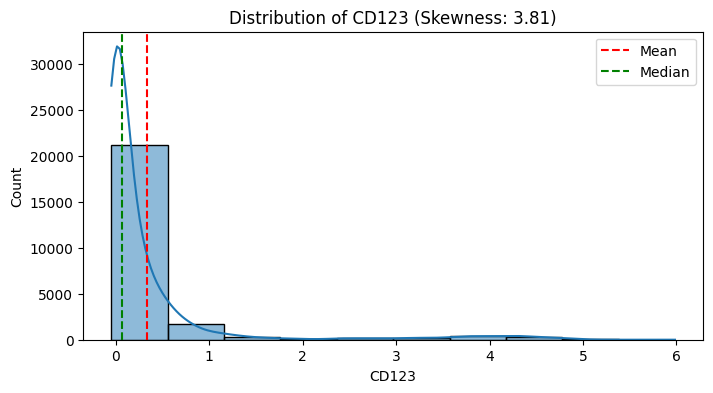

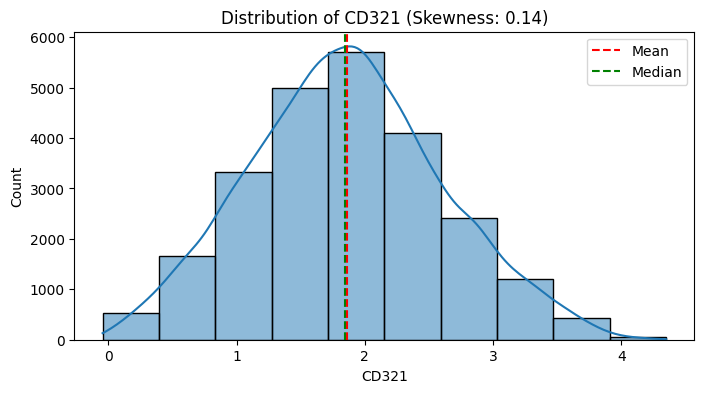

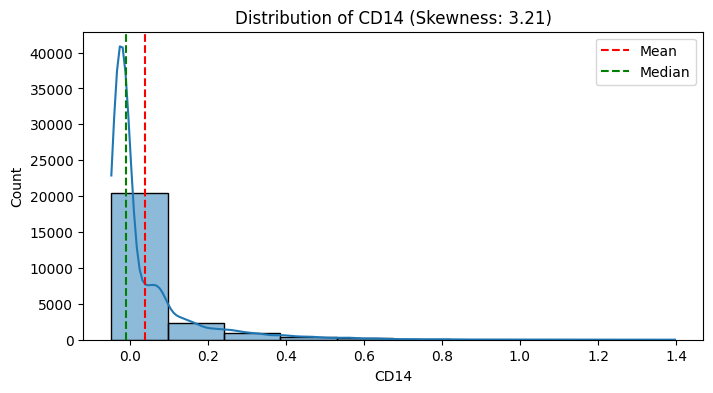

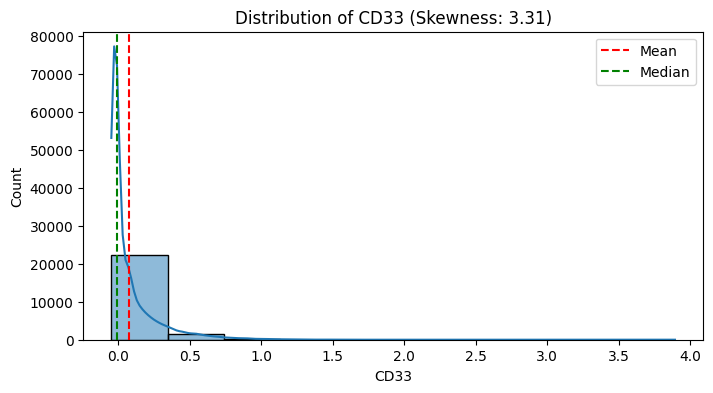

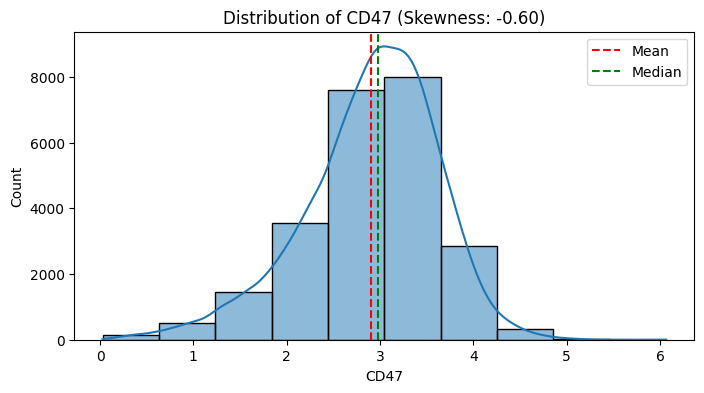

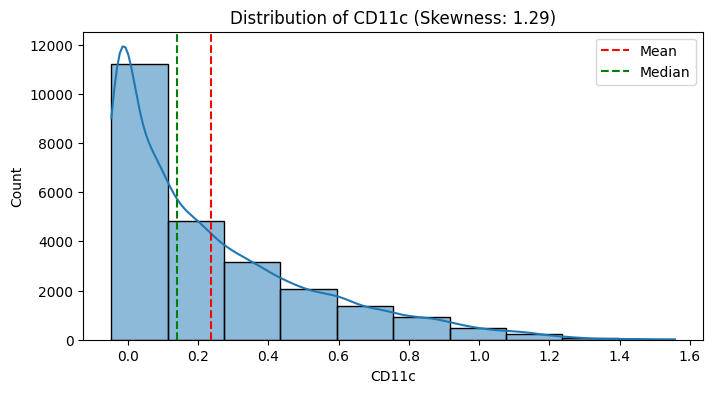

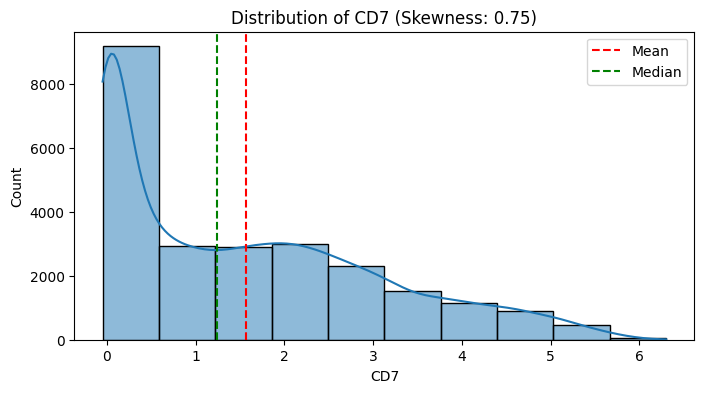

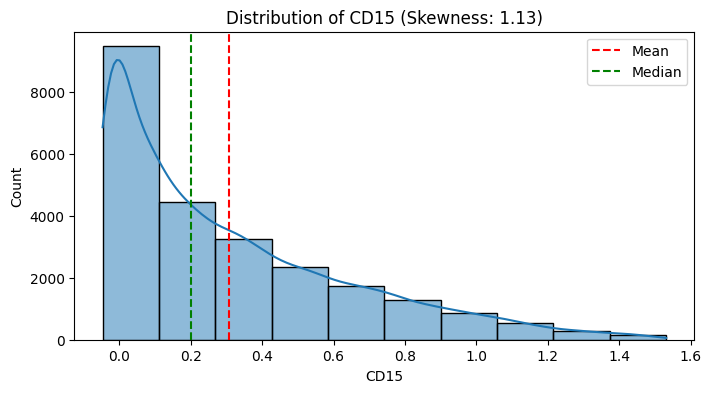

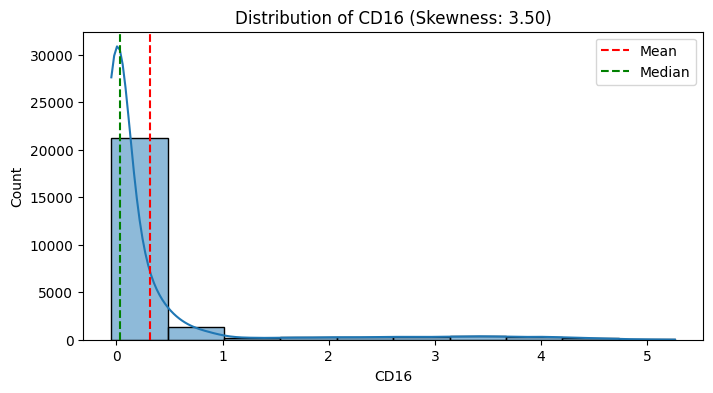

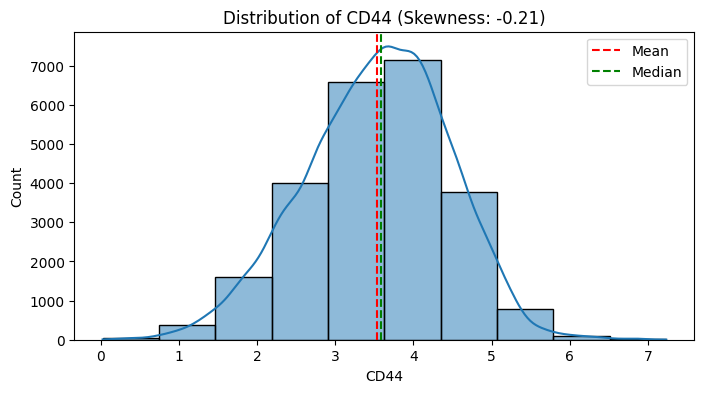

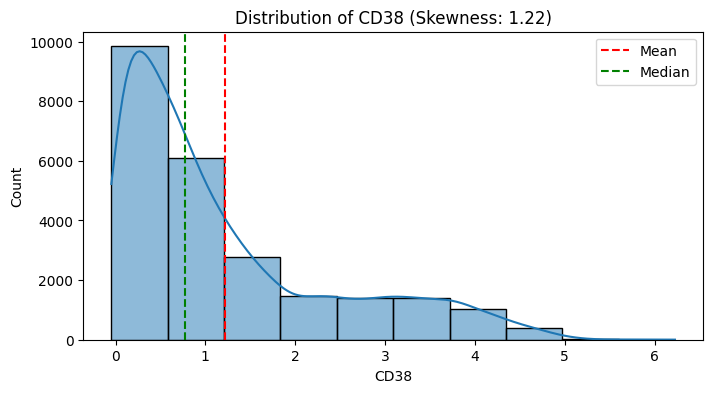

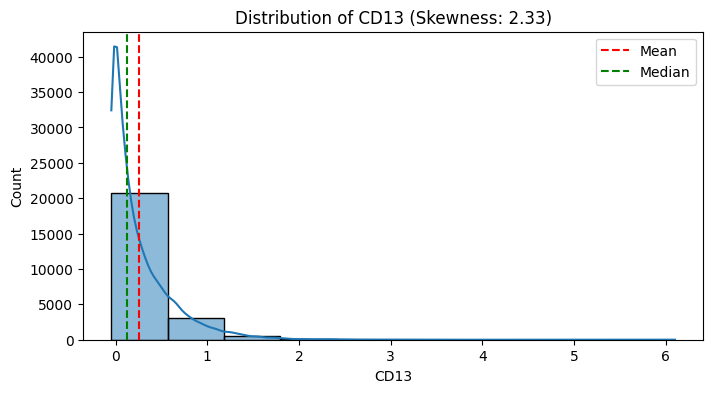

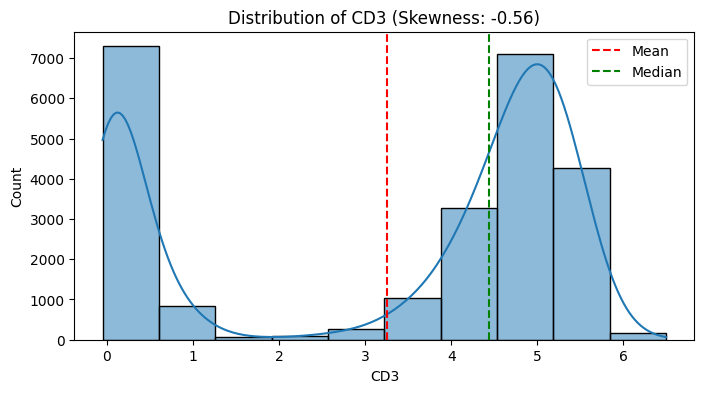

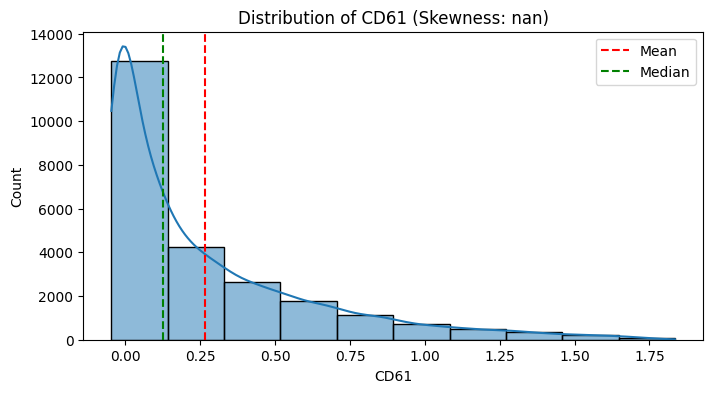

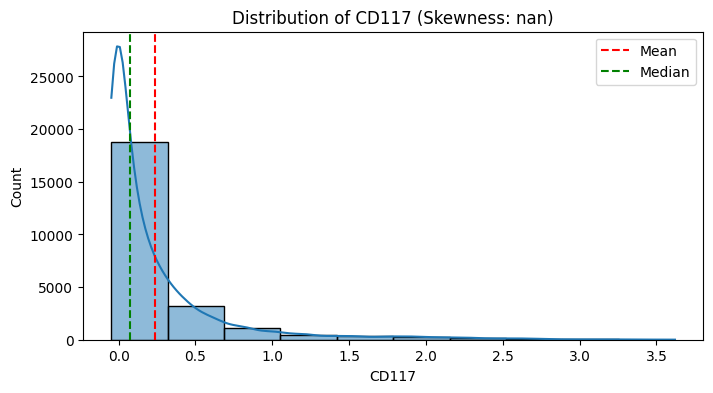

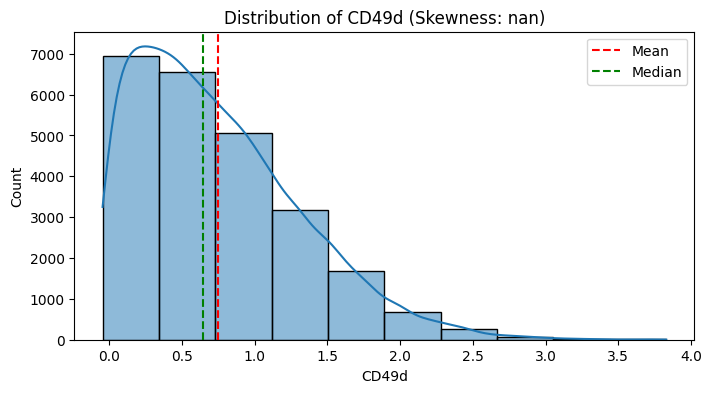

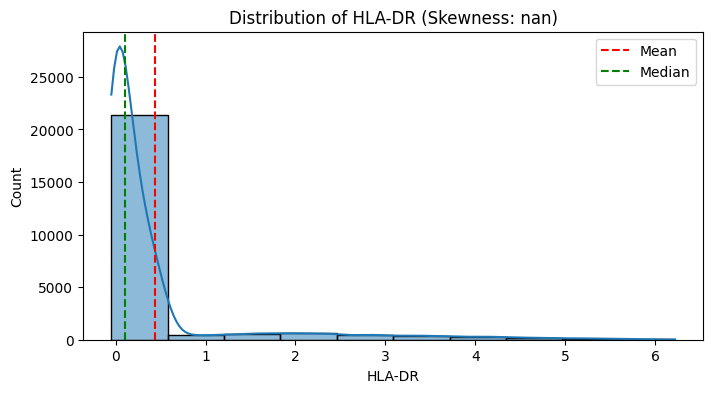

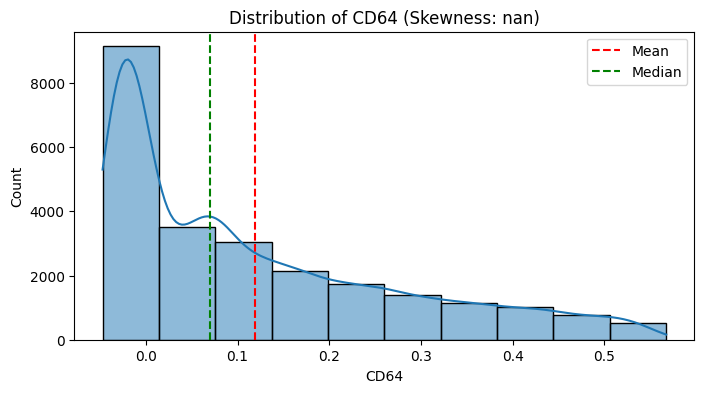

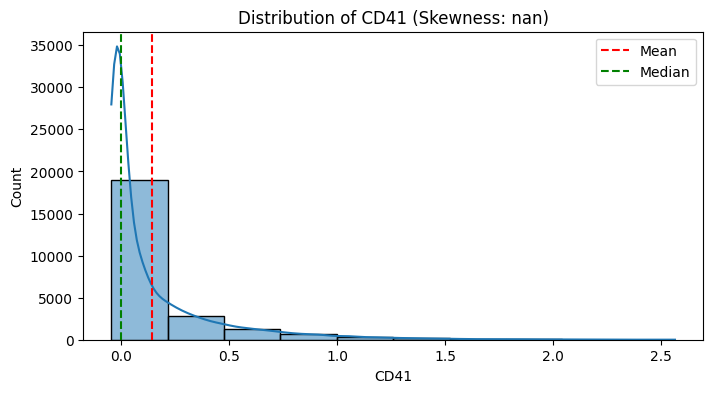

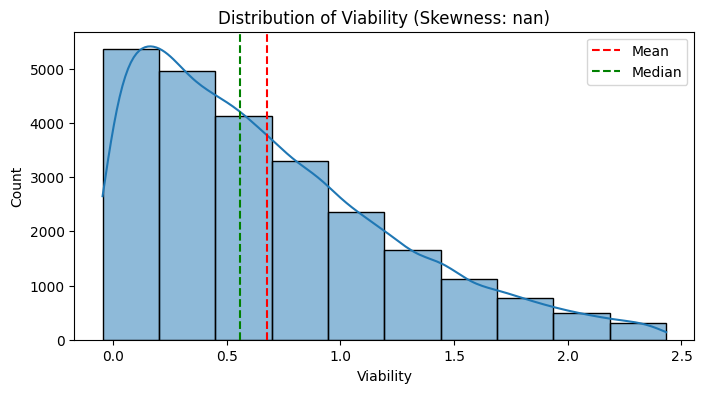

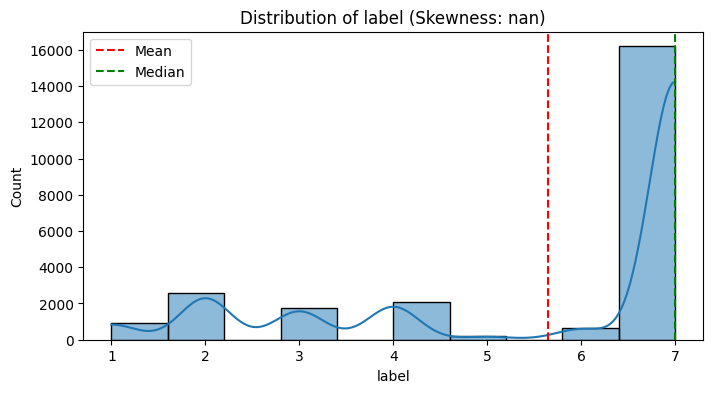

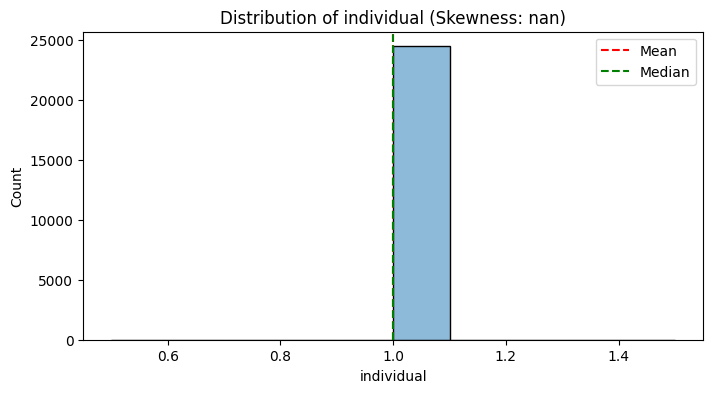

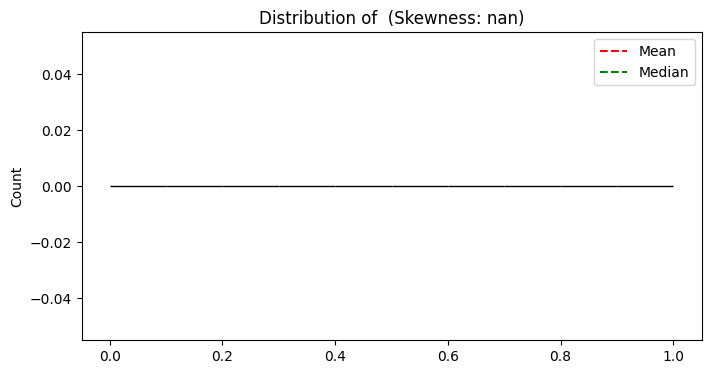

In [23]:
# Select only numerical columns for skewness calculation
numerical_cols = levin_df.select_dtypes(include=np.number).columns
skewness = levin_df[numerical_cols].apply(skew)

# Function to categorize skewness
def categorize_skewness(value):
    if value > 0.5:
        return 'Right-skewed'
    elif value < -0.5:
        return 'Left-skewed'
    else:
        return 'Approximately symmetrical'

# Apply the categorization
skewness_category = skewness.apply(categorize_skewness)

# Display skewness and its categorization
skewness_df = pd.DataFrame({'Skewness': skewness, 'Category': skewness_category})
print(skewness_df)

# Plot histograms for each numerical column
for col in numerical_cols: # Iterate through numerical columns only
    plt.figure(figsize=(8, 4))
    sns.histplot(levin_df[col], bins=10, kde=True)
    plt.title(f'Distribution of {col} (Skewness: {skewness[col]:.2f})')
    plt.axvline(levin_df[col].mean(), color='red', linestyle='--', label='Mean')
    plt.axvline(levin_df[col].median(), color='green', linestyle='--', label='Median')
    plt.legend()
    plt.show()

In [ ]:
#17/10/2024

In [24]:
import tensorflow as tf
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

n_samples = 1000
train_images_flat = train_images[:n_samples].reshape(n_samples, -1)
import tensorflow as tf
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

n_samples = 1000
train_images_flat = train_images[:n_samples].reshape(n_samples, -1)
train_labels_subset = train_labels[:n_samples]

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000, verbose=1)
tsne_results = tsne.fit_transform(train_images_flat)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.104s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 2.756635
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.076698
[t-SNE] KL divergence after 1000 iterations: 0.901050


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.002s...
[t-SNE] Computed neighbors for 1000 samples in 0.075s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 2.756635
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.076698
[t-SNE] KL divergence after 1000 iterations: 0.901050


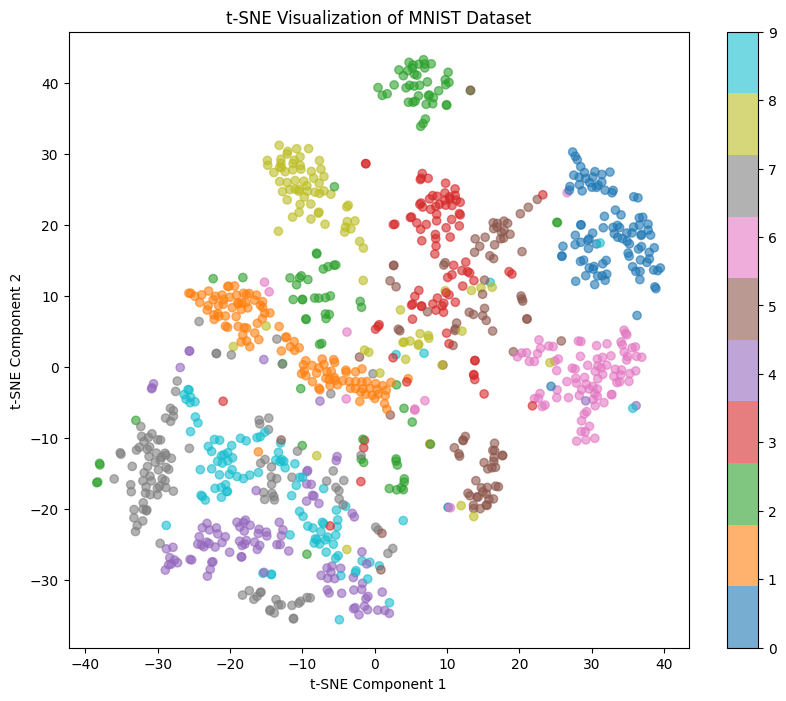

In [25]:
train_images_tsne = tsne.fit_transform(train_images_flat)

# plot the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(train_images_tsne[:, 0], train_images_tsne[:, 1], c=train_labels_subset, cmap='tab10', alpha=0.6)
plt.colorbar(scatter, ticks=range(10))
plt.title('t-SNE Visualization of MNIST Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

In [27]:

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np # Import numpy

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Replace empty strings or spaces with NaN
levin_df = levin_df.replace(r'^\s*$', np.nan, regex=True)  # Use np.nan directly

# Convert all columns to numeric, coerce errors to NaN
for col in levin_df.columns:
    levin_df[col] = pd.to_numeric(levin_df[col], errors='coerce')

# Standardize all columns in the dataset (using the imputed data)
levin_df[:] = scaler.fit_transform(levin_df)

# Check the standardized data
print(levin_df.head())

       Time   Cell_length      DNA1      DNA2    CD45RA     CD133      CD19  \
0  0.003799      0.218182  0.380681  0.454713  0.032599  0.005102  0.010180   
1  0.005271      0.454545  0.368682  0.492802  0.112418  0.003545  0.008208   
2  0.009899      0.400000  0.249642  0.410614  0.097929  0.004631  0.026137   
3  0.010017      0.345455  0.348592  0.495353  0.072765  0.005455  0.008008   
4  0.010865      0.272727  0.282425  0.433546  0.007186  0.004974  0.027438   

       CD22     CD11b       CD4  ...     CD49d    HLA-DR      CD64      CD41  \
0  0.023713  0.009222  0.063461  ...  0.174915  0.242242  0.011544  0.007238   
1  0.025250  0.162862  0.003363  ...  0.049100  0.077290  0.044364  0.119109   
2  0.002753  0.010595  0.007376  ...  0.507480  0.192154  0.010323  0.006151   
3  0.002543  0.148887  0.005827  ...  0.268010  0.027916  0.009779  0.004141   
4  0.106009  0.219187  0.091949  ...  0.045858  0.035906  0.029363  0.002283   

    Viability   file_number   event_number  

Index(['Time', ' Cell_length', ' DNA1', ' DNA2', ' CD45RA', ' CD133', ' CD19',
       ' CD22', ' CD11b', ' CD4', ' CD8', ' CD34', ' Flt3', ' CD20', ' CXCR4',
       ' CD235ab', ' CD45', ' CD123', ' CD321', ' CD14', ' CD33', ' CD47',
       ' CD11c', ' CD7', ' CD15', ' CD16', ' CD44', ' CD38', ' CD13', ' CD3',
       ' CD61', ' CD117', ' CD49d', ' HLA-DR', ' CD64', ' CD41', ' Viability',
       ' file_number', ' event_number', ' label', ' individual', ' '],
      dtype='object')
Error: 'label' column not found in the DataFrame.
     Standard deviation  Proportion of Variance  Cumulative Proportion
PC1            2.401951                0.144234               0.144234
PC2            2.346199                0.137616               0.281849
PC3            1.961911                0.096227               0.378076
PC4            1.643769                0.067549               0.445626


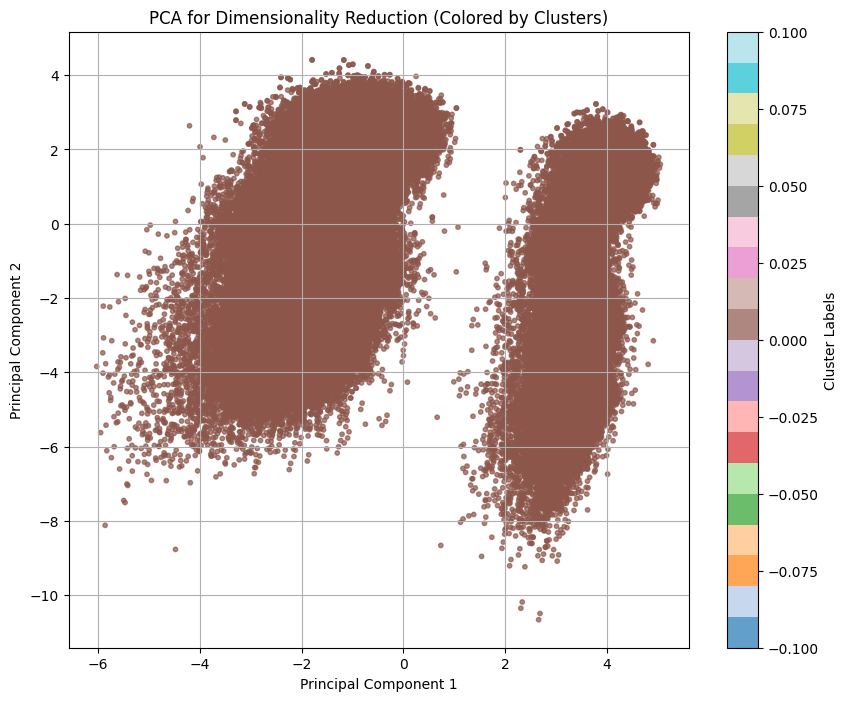

In [36]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np # Import numpy
from sklearn.impute import SimpleImputer # Import SimpleImputer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
print(levin_df.columns)

columns_to_drop = ['Event', 'Time', 'Cell_length', 'file_number', 'event_number', 'individual']  # Removed 'label' from this list

# Check if 'label' column exists before accessing it
if 'label' in levin_df.columns:
    labels = levin_df['label']
else:
    # Handle the case where 'label' column is missing
    # For example, you can create a default label array or raise an error
    print("Error: 'label' column not found in the DataFrame.")
    # If 'label' column is not found, create a default label array with all values set to 0
    labels = np.zeros(len(levin_df))  # Example: Create default labels

# Drop the columns, ensuring errors='ignore' to avoid KeyError if a column is not found
filtered_df = levin_df.drop(columns=columns_to_drop, errors='ignore')

imputer = SimpleImputer(strategy='mean')
filled_df = imputer.fit_transform(filtered_df)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(filled_df)

# Perform PCA
pca = PCA(n_components=4)  # Set to 4 components for demonstration
pca_transformed = pca.fit_transform(scaled_data)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
std_dev = np.sqrt(pca.explained_variance_)

# Create a summary table for PCA results
pca_summary = pd.DataFrame({
    'Standard deviation': std_dev,
    'Proportion of Variance': explained_variance,
    'Cumulative Proportion': cumulative_variance
}, index=[f'PC{i+1}' for i in range(len(std_dev))])
print(pca_summary)

# Scatter plot for the first two components, with different colors for different clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_transformed[:, 0], pca_transformed[:, 1], c=labels, cmap='tab20', s=10, alpha=0.7)
plt.colorbar(scatter, label='Cluster Labels')
plt.title('PCA for Dimensionality Reduction (Colored by Clusters)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [ ]:
#3D plot for PCA

Actual columns in DataFrame: ['Time', ' Cell_length', ' DNA1', ' DNA2', ' CD45RA', ' CD133', ' CD19', ' CD22', ' CD11b', ' CD4', ' CD8', ' CD34', ' Flt3', ' CD20', ' CXCR4', ' CD235ab', ' CD45', ' CD123', ' CD321', ' CD14', ' CD33', ' CD47', ' CD11c', ' CD7', ' CD15', ' CD16', ' CD44', ' CD38', ' CD13', ' CD3', ' CD61', ' CD117', ' CD49d', ' HLA-DR', ' CD64', ' CD41', ' Viability', ' file_number', ' event_number', ' label', ' individual', ' ']
Error: 'label' column not found in the DataFrame.
     Standard deviation  Proportion of Variance  Cumulative Proportion
PC1            2.401951                0.144234               0.144234
PC2            2.346199                0.137616               0.281849
PC3            1.961911                0.096227               0.378076
PC4            1.643769                0.067549               0.445626


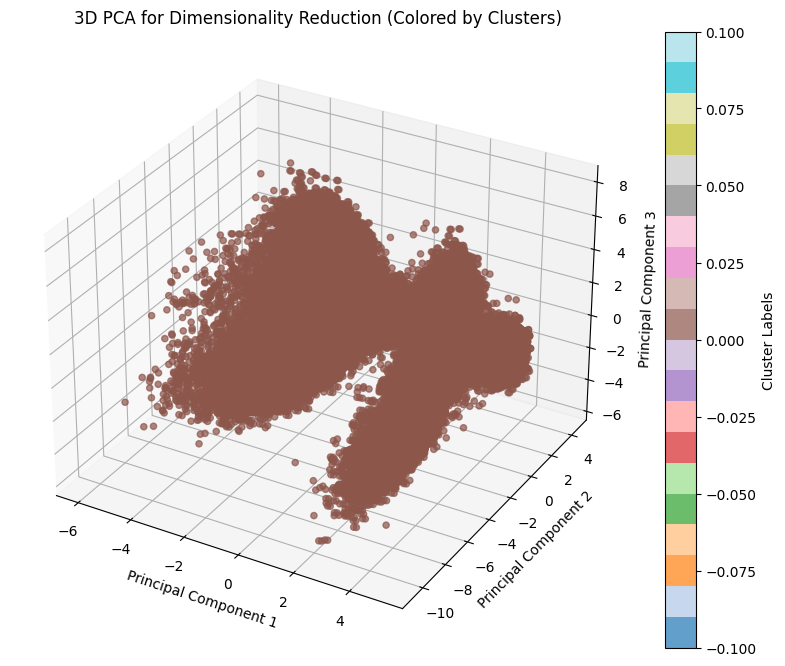

In [39]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Assuming df is already loaded and 'label' column exists for cluster labeling

# Get actual column names from your DataFrame
actual_columns = levin_df.columns.tolist()
print(f"Actual columns in DataFrame: {actual_columns}")

# Define columns to drop, ensuring they are present in the DataFrame
columns_to_drop = ['Event', 'Time', 'Cell_length', 'file_number', 'event_number', 'individual']
# Removed 'label' from columns_to_drop as it's needed for labeling

# Filter out columns that are not in the DataFrame
columns_to_drop = [col for col in columns_to_drop if col in actual_columns]

# Drop the columns, errors='ignore' is no longer needed since we've filtered
filtered_df = levin_df.drop(columns=columns_to_drop)

# Check if 'label' column exists before accessing it
if 'label' in levin_df.columns:
    labels = levin_df['label']
else:
    # Handle the case where 'label' column is missing
    print("Error: 'label' column not found in the DataFrame.")
    # If 'label' column is not found, create a default label array with all values set to 0
    labels = np.zeros(len(levin_df))  # Example: Create default labels


imputer = SimpleImputer(strategy='mean')
filled_df = imputer.fit_transform(filtered_df)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(filled_df)

# Perform PCA for 4 components
pca = PCA(n_components=4)
pca_transformed = pca.fit_transform(scaled_data)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
std_dev = np.sqrt(pca.explained_variance_)

# Create a summary table for PCA results
pca_summary = pd.DataFrame({
    'Standard deviation': std_dev,
    'Proportion of Variance': explained_variance,
    'Cumulative Proportion': cumulative_variance
}, index=[f'PC{i+1}' for i in range(len(std_dev))])

print(pca_summary)
# 3D scatter plot for the first three components, with different colors for different clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(pca_transformed[:, 0], pca_transformed[:, 1], pca_transformed[:, 2],
                     c=labels, cmap='tab20', s=20, alpha=0.7)

# Add labels and colorbar
ax.set_title('3D PCA for Dimensionality Reduction (Colored by Clusters)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
fig.colorbar(scatter, ax=ax, label='Cluster Labels')

In [ ]:
#tsne

In [40]:
import sklearn
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [42]:
print(levin_df.columns) # Print available column names

# Replace with actual column names from the printed output
# Carefully check spelling and case sensitivity
columns_to_remove = ['Time', 'Cell_length', 'file_number', 'event_number', 'label', 'individual']

# Use a list comprehension to filter out columns not present in the DataFrame
valid_columns_to_remove = [col for col in columns_to_remove if col in levin_df.columns]

columns_to_remover = levin_df.drop(columns=valid_columns_to_remove)

len(columns_to_remover.columns)

Index(['Time', ' Cell_length', ' DNA1', ' DNA2', ' CD45RA', ' CD133', ' CD19',
       ' CD22', ' CD11b', ' CD4', ' CD8', ' CD34', ' Flt3', ' CD20', ' CXCR4',
       ' CD235ab', ' CD45', ' CD123', ' CD321', ' CD14', ' CD33', ' CD47',
       ' CD11c', ' CD7', ' CD15', ' CD16', ' CD44', ' CD38', ' CD13', ' CD3',
       ' CD61', ' CD117', ' CD49d', ' HLA-DR', ' CD64', ' CD41', ' Viability',
       ' file_number', ' event_number', ' label', ' individual', ' '],
      dtype='object')


41

In [43]:
import tensorflow as tf
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess MNIST data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Select a subset of data for t-SNE
n_samples = 1000
train_images_flat = train_images[:n_samples].reshape(n_samples, -1)
train_labels_subset = train_labels[:n_samples] # Defining train_labels_subset here

features = columns_to_remover
# Instead of accessing df['label'], use the original labels before dropping columns
labels = train_labels_subset

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.032s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 1.384183
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.696167
[t-SNE] KL divergence after 1000 iterations: 1.645140


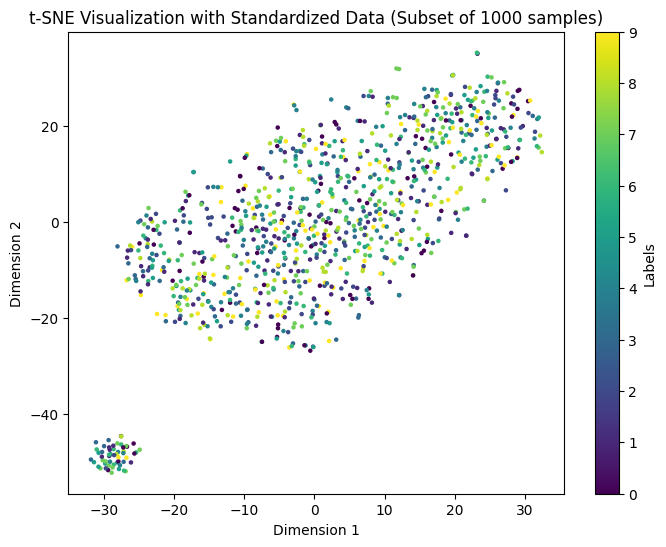

In [44]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer  # Import SimpleImputer

# Convert all columns to numeric, coercing errors to NaN
features = features.apply(pd.to_numeric, errors='coerce')

# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Replace 'mean' with your desired strategy
features_imputed = imputer.fit_transform(features)

scaler = StandardScaler()
features_standardized = scaler.fit_transform(features_imputed)

# Updated: n_samples should match the size of labels
n_samples = min(len(features_standardized), len(labels))  # Use the minimum size

# Generate subset_indices within the bounds of both features and labels
subset_indices = np.random.choice(n_samples, n_samples, replace=False)

subset_features = features_standardized[subset_indices]
subset_labels = labels[subset_indices]

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000, verbose=1)
tsne_result = tsne.fit_transform(subset_features)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=subset_labels, cmap='viridis', s=5)
plt.title('t-SNE Visualization with Standardized Data (Subset of {} samples)'.format(n_samples))
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

plt.colorbar(scatter, label='Labels')
plt.show()